<h1 style=font-size:56px>SARS-CoV-2 Data Science Project</h1>                                              

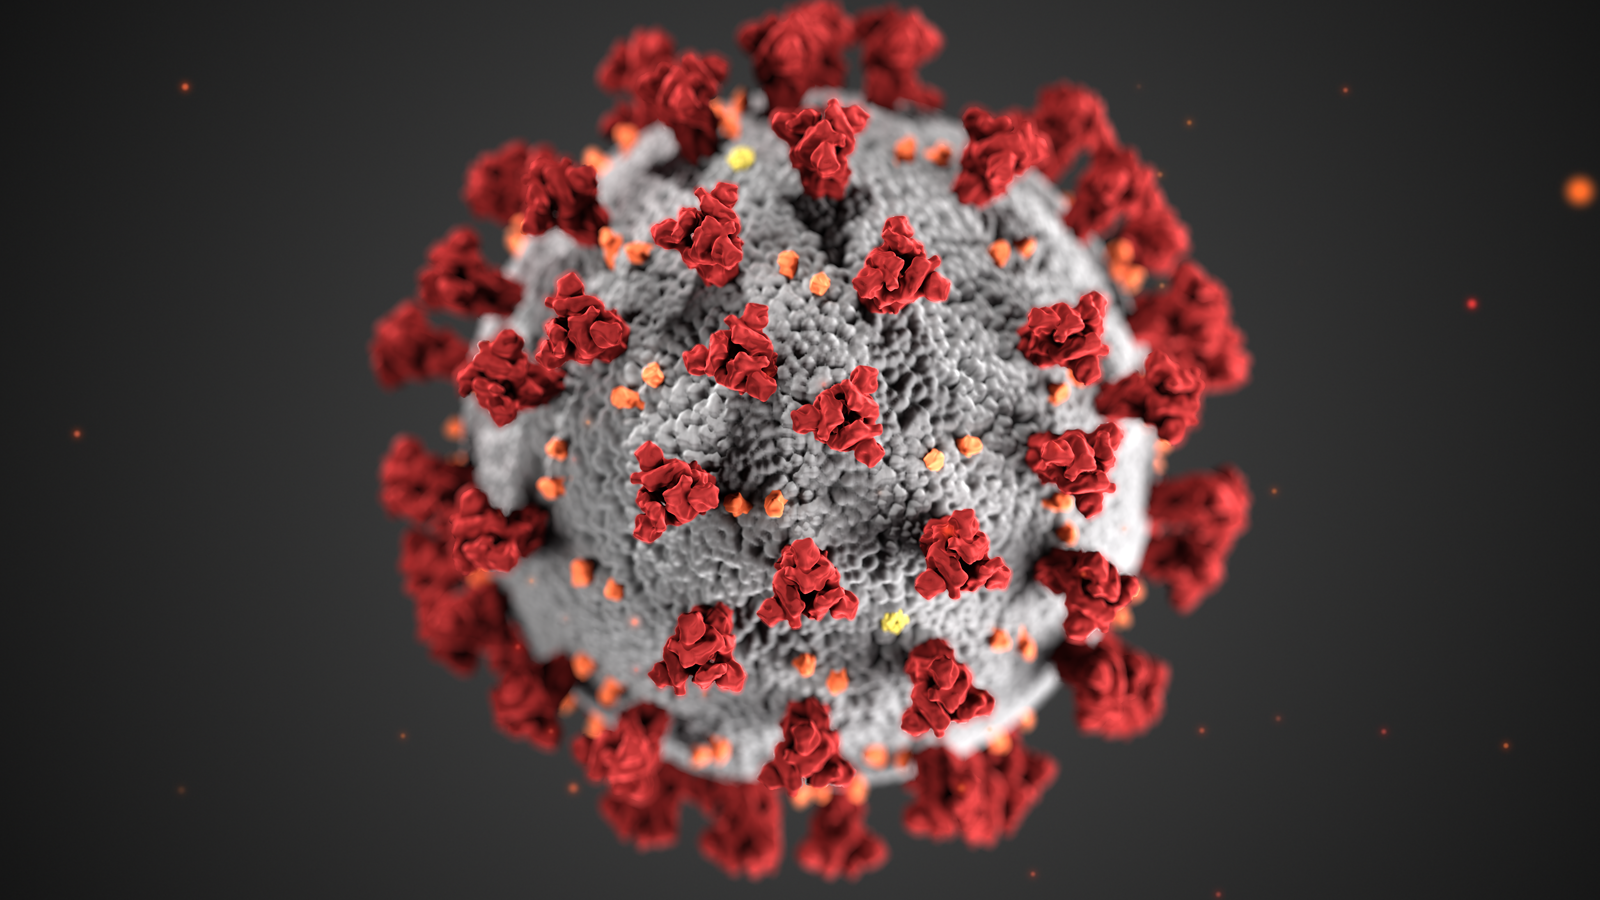
   
**Project Description:**
The purpose of this project is to apply Data Science techniques to practical, real world data sets. I began by graphing various features against one another to identify any patterns or trends that may reside within the data. My current goal is to validate any potential relationships via statistical measures (p-values) and then create a machine learning model that can reasonably estimate future results. The data set I used for this project came from Our World in Data's Github and accounts for the latest updates they have regarding various features of SARS-CoV-2 (total vaccinated, location, continent, total deaths, population density, etc.).

<br />

**Data Source:**
[OWID GitHub Data Source](https://github.com/owid/covid-19-data/blob/master/public/data/latest/owid-covid-latest.json)
<br />
<br />

**Data Science Packages Used**:
<ol>
    <li>Numpy</li>
    <li>Pandas</li>
    <li>Matplotlib</li>
    <li>Seaborn</li>
    <li>Scipy</li>
    <li>Scikit Learn</li>
</ol>


In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import json

In [2]:
# import sys
# !{sys.executable} -m pip install plotly

# Loading JSON from OWID GitHub into Pandas DataFrame


In [3]:
results = requests.get(url="https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/latest/owid-covid-latest.json")

# Transposing to represent map rows to countries and columns to SARS-CoV-2 characteristics
df = pd.read_json(results.content).transpose()

In [4]:
# Saving JSON locally
with open("latest.json") as json_file:
    json.dumps(results.json())
    json_file.close()

In [5]:
# Filtering any any entries with OWID since they represent regional statistics
countries = df[df["continent"].notnull()].drop(["OWID_KOS", "OWID_CYN"], axis=0)

# Deciding How to Filter Null Figures

In [6]:
def percent_missing(df):
    percent_nan = 100 * countries.isnull().sum() / len(countries)
    percent_nan = percent_nan[percent_nan > 0].sort_values(ascending=False)
    
    return percent_nan

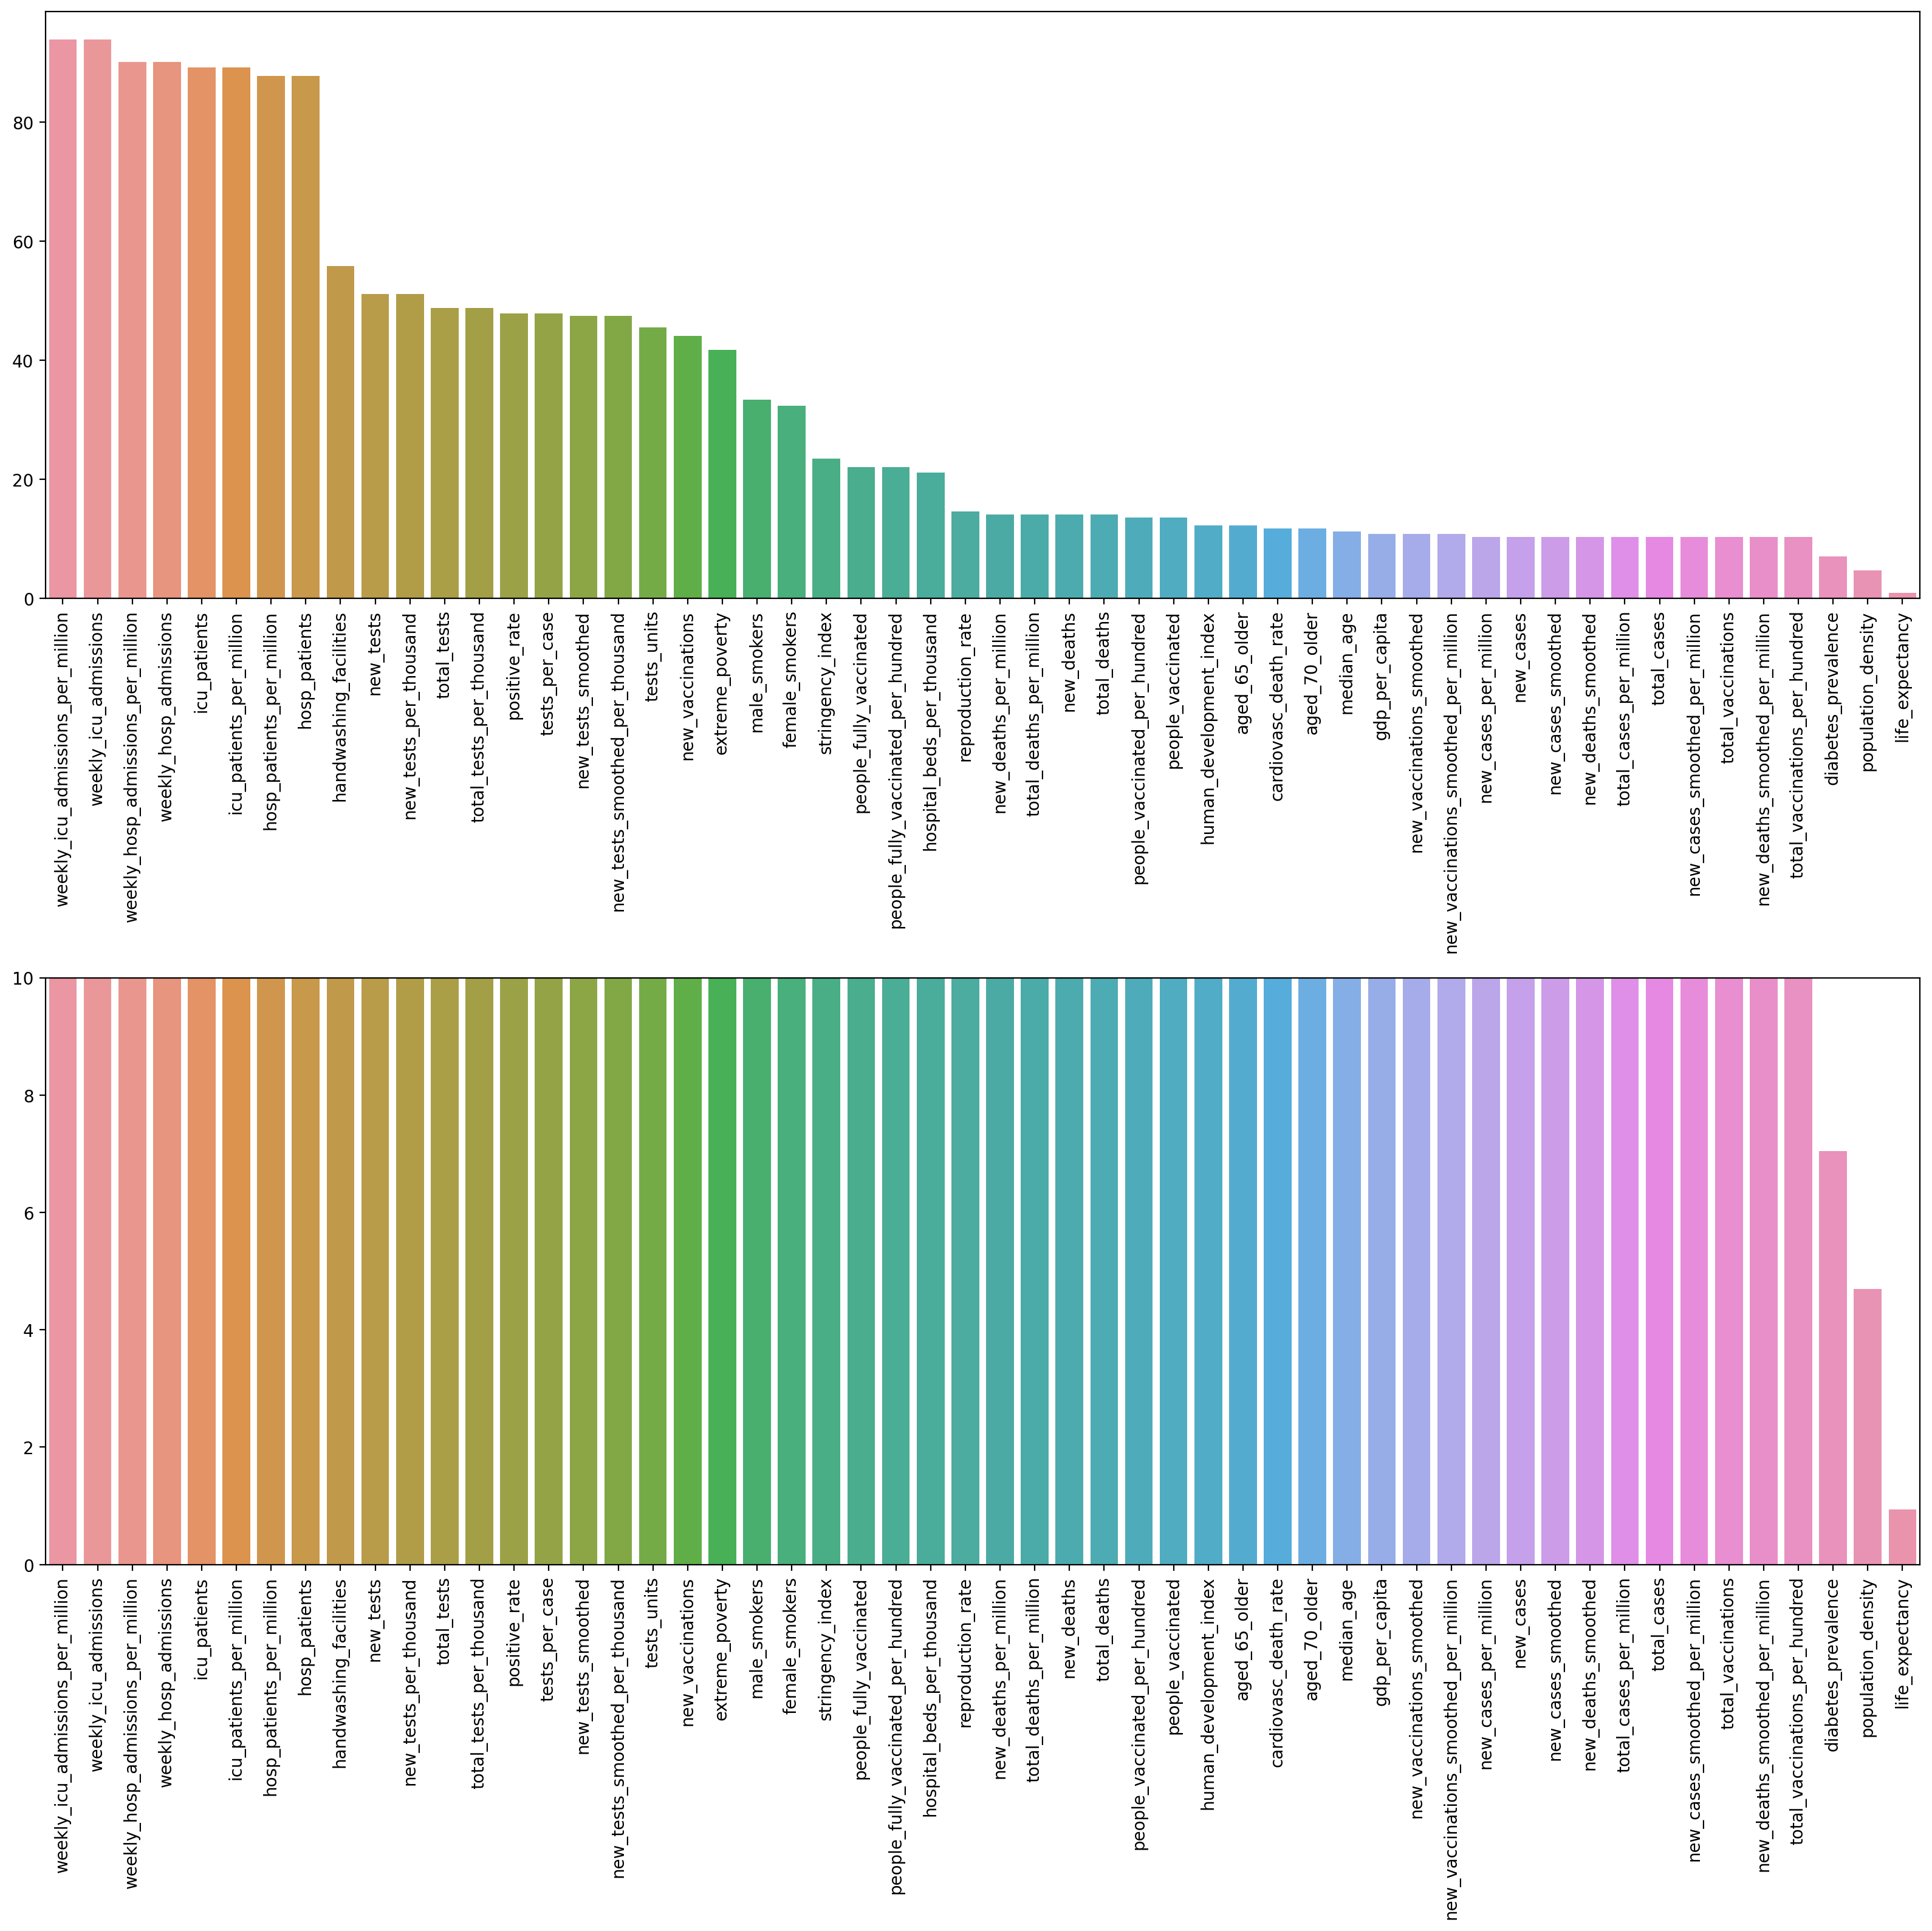

In [7]:
percent_nan = percent_missing(countries)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 16), dpi=200)

for axes in ax:
    sns.barplot(x=percent_nan.index, y=percent_nan, ax=axes)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

ax[1].set_ylim(0, 10)
plt.tight_layout()
plt.show();

Note that Population Density, Diabetes Prevalence and Reproduction Rate are a relatively small proportion of our data set. Thus, this indicates there are a small number of rows with only one feature missing. Thus, these features are good candidates for being dropped from our data set.

In [8]:
countries[countries["population"].isnull()]

Empty DataFrame
Columns: [continent, location, last_updated_date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, new_vaccinations_smoothed_per_million, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index]
Index: []

[0 rows x 58 columns]

In [9]:
percent_nan = percent_missing(countries)
rows_to_drop = percent_nan[percent_nan < 10].index
countries = countries.dropna(axis=0, subset=rows_to_drop)
# countries = countries.dropna(axis=0, subset=["population"])
# countries = countries.dropna(axis=0, subset=["life_expectancy"])
# countries = countries.dropna(axis=0, subset=["population_density"])
# len(countries), len(countries_dropped_rows)

In [10]:
percent_nan = percent_missing(countries)
countries[countries["population_density"].isnull()]

Empty DataFrame
Columns: [continent, location, last_updated_date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, new_vaccinations_smoothed_per_million, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index]
Index: []

[0 rows x 58 columns]

In [11]:
countries[countries["population"].isnull()]

Empty DataFrame
Columns: [continent, location, last_updated_date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, new_vaccinations_smoothed_per_million, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index]
Index: []

[0 rows x 58 columns]

In [12]:
countries[countries["life_expectancy"].isnull()]

Empty DataFrame
Columns: [continent, location, last_updated_date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, new_tests, total_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, positive_rate, tests_per_case, tests_units, total_vaccinations, people_vaccinated, people_fully_vaccinated, new_vaccinations, new_vaccinations_smoothed, total_vaccinations_per_hundred, people_vaccinated_per_hundred, people_fully_vaccinated_per_hundred, new_vaccinations_smoothed_per_million, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index]
Index: []

[0 rows x 58 columns]

It is worth noting that dropping the rows of data that contained null values for population, population density, and life expectancy was a decent call. Our sample population decreased by 10 rows, but not we do not have to worry about null values in those particular features. 

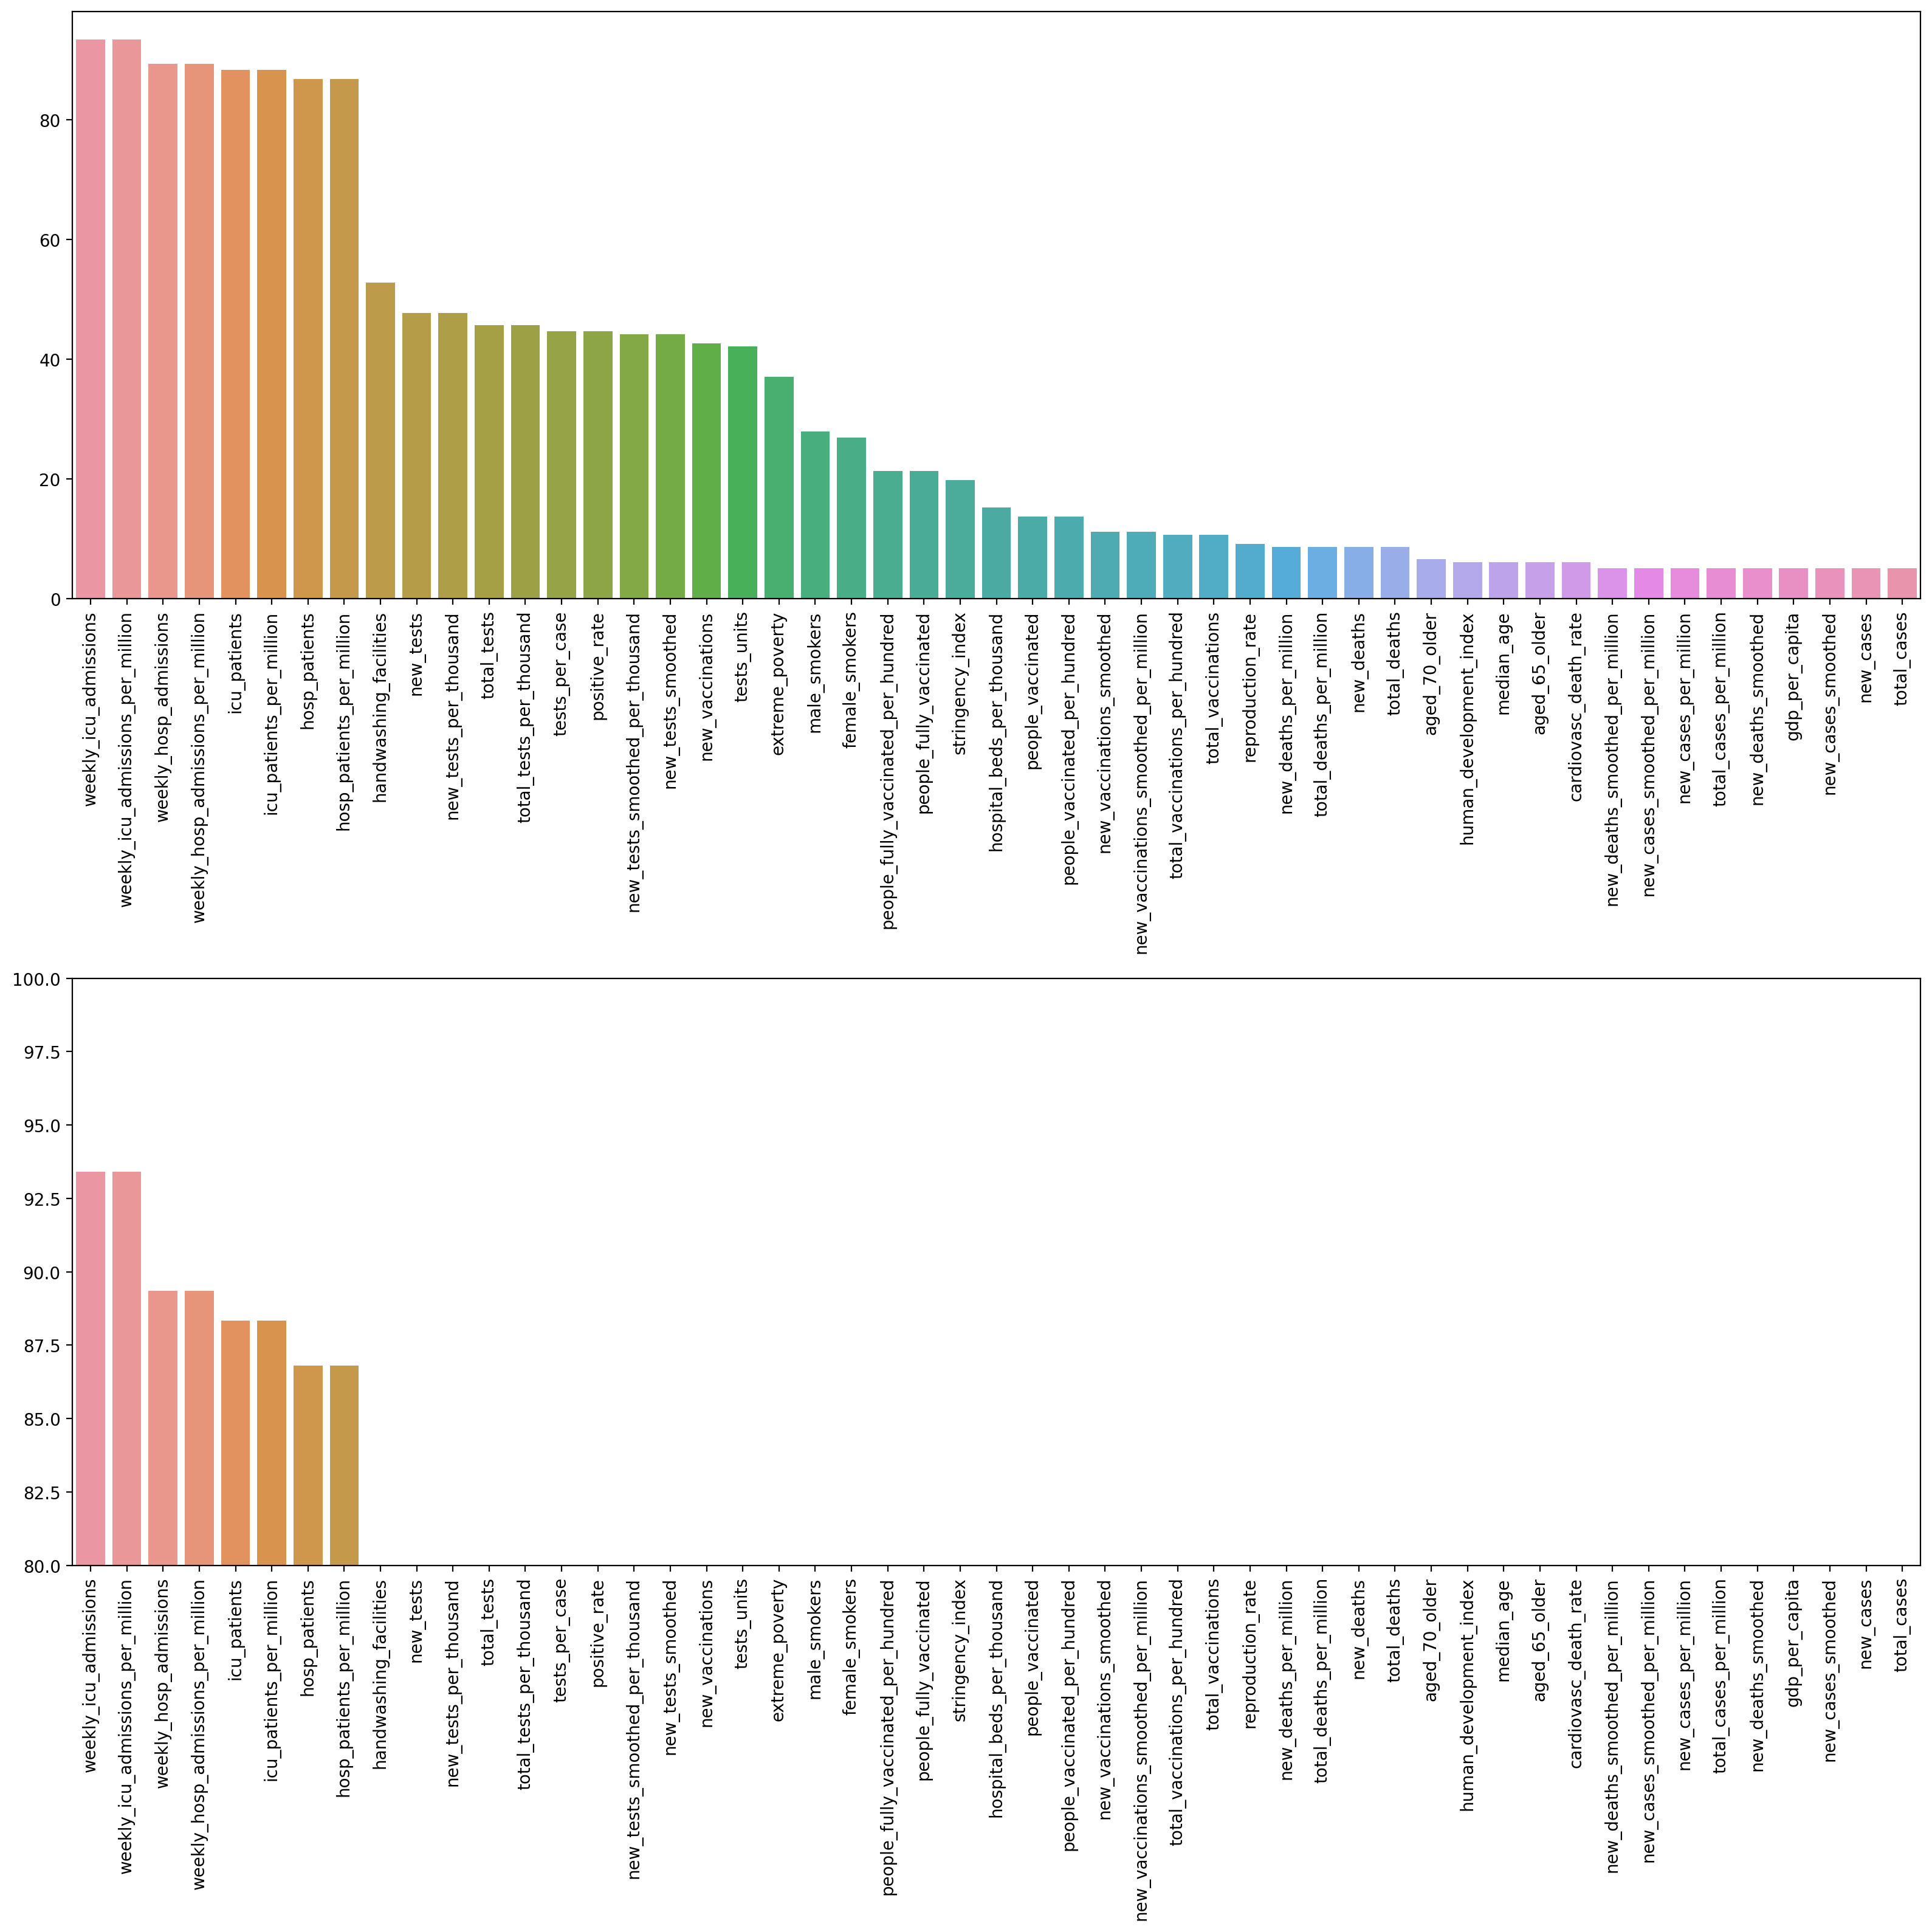

In [13]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 16), dpi=200)

for axes in ax:
    sns.barplot(x=percent_nan.index, y=percent_nan, ax=axes)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

ax[1].set_ylim(80, 100)
plt.tight_layout()
plt.show();

A higher percentage of missing values indicates that we may have columns worth dropping, since they are null more often than not in most entries. Let us pull these 8 features that are greater than 85% to see which features is commonly null. 

In [14]:
percent_nan = percent_missing(countries)
percent_nan.sort_values(ascending=False)[:8]

weekly_icu_admissions                 93.401015
weekly_icu_admissions_per_million     93.401015
weekly_hosp_admissions                89.340102
weekly_hosp_admissions_per_million    89.340102
icu_patients                          88.324873
icu_patients_per_million              88.324873
hosp_patients                         86.802030
hosp_patients_per_million             86.802030
dtype: float64

In [15]:
highest_dropped = countries["weekly_icu_admissions"].isnull().sum()
lowest_dropped = countries["hosp_patients_per_million"].isnull().sum()

highest_dropped, lowest_dropped

(184, 171)

In [16]:
dropped = percent_nan.sort_values(ascending=False).index[:8]

countries = countries.drop(dropped, axis=1)

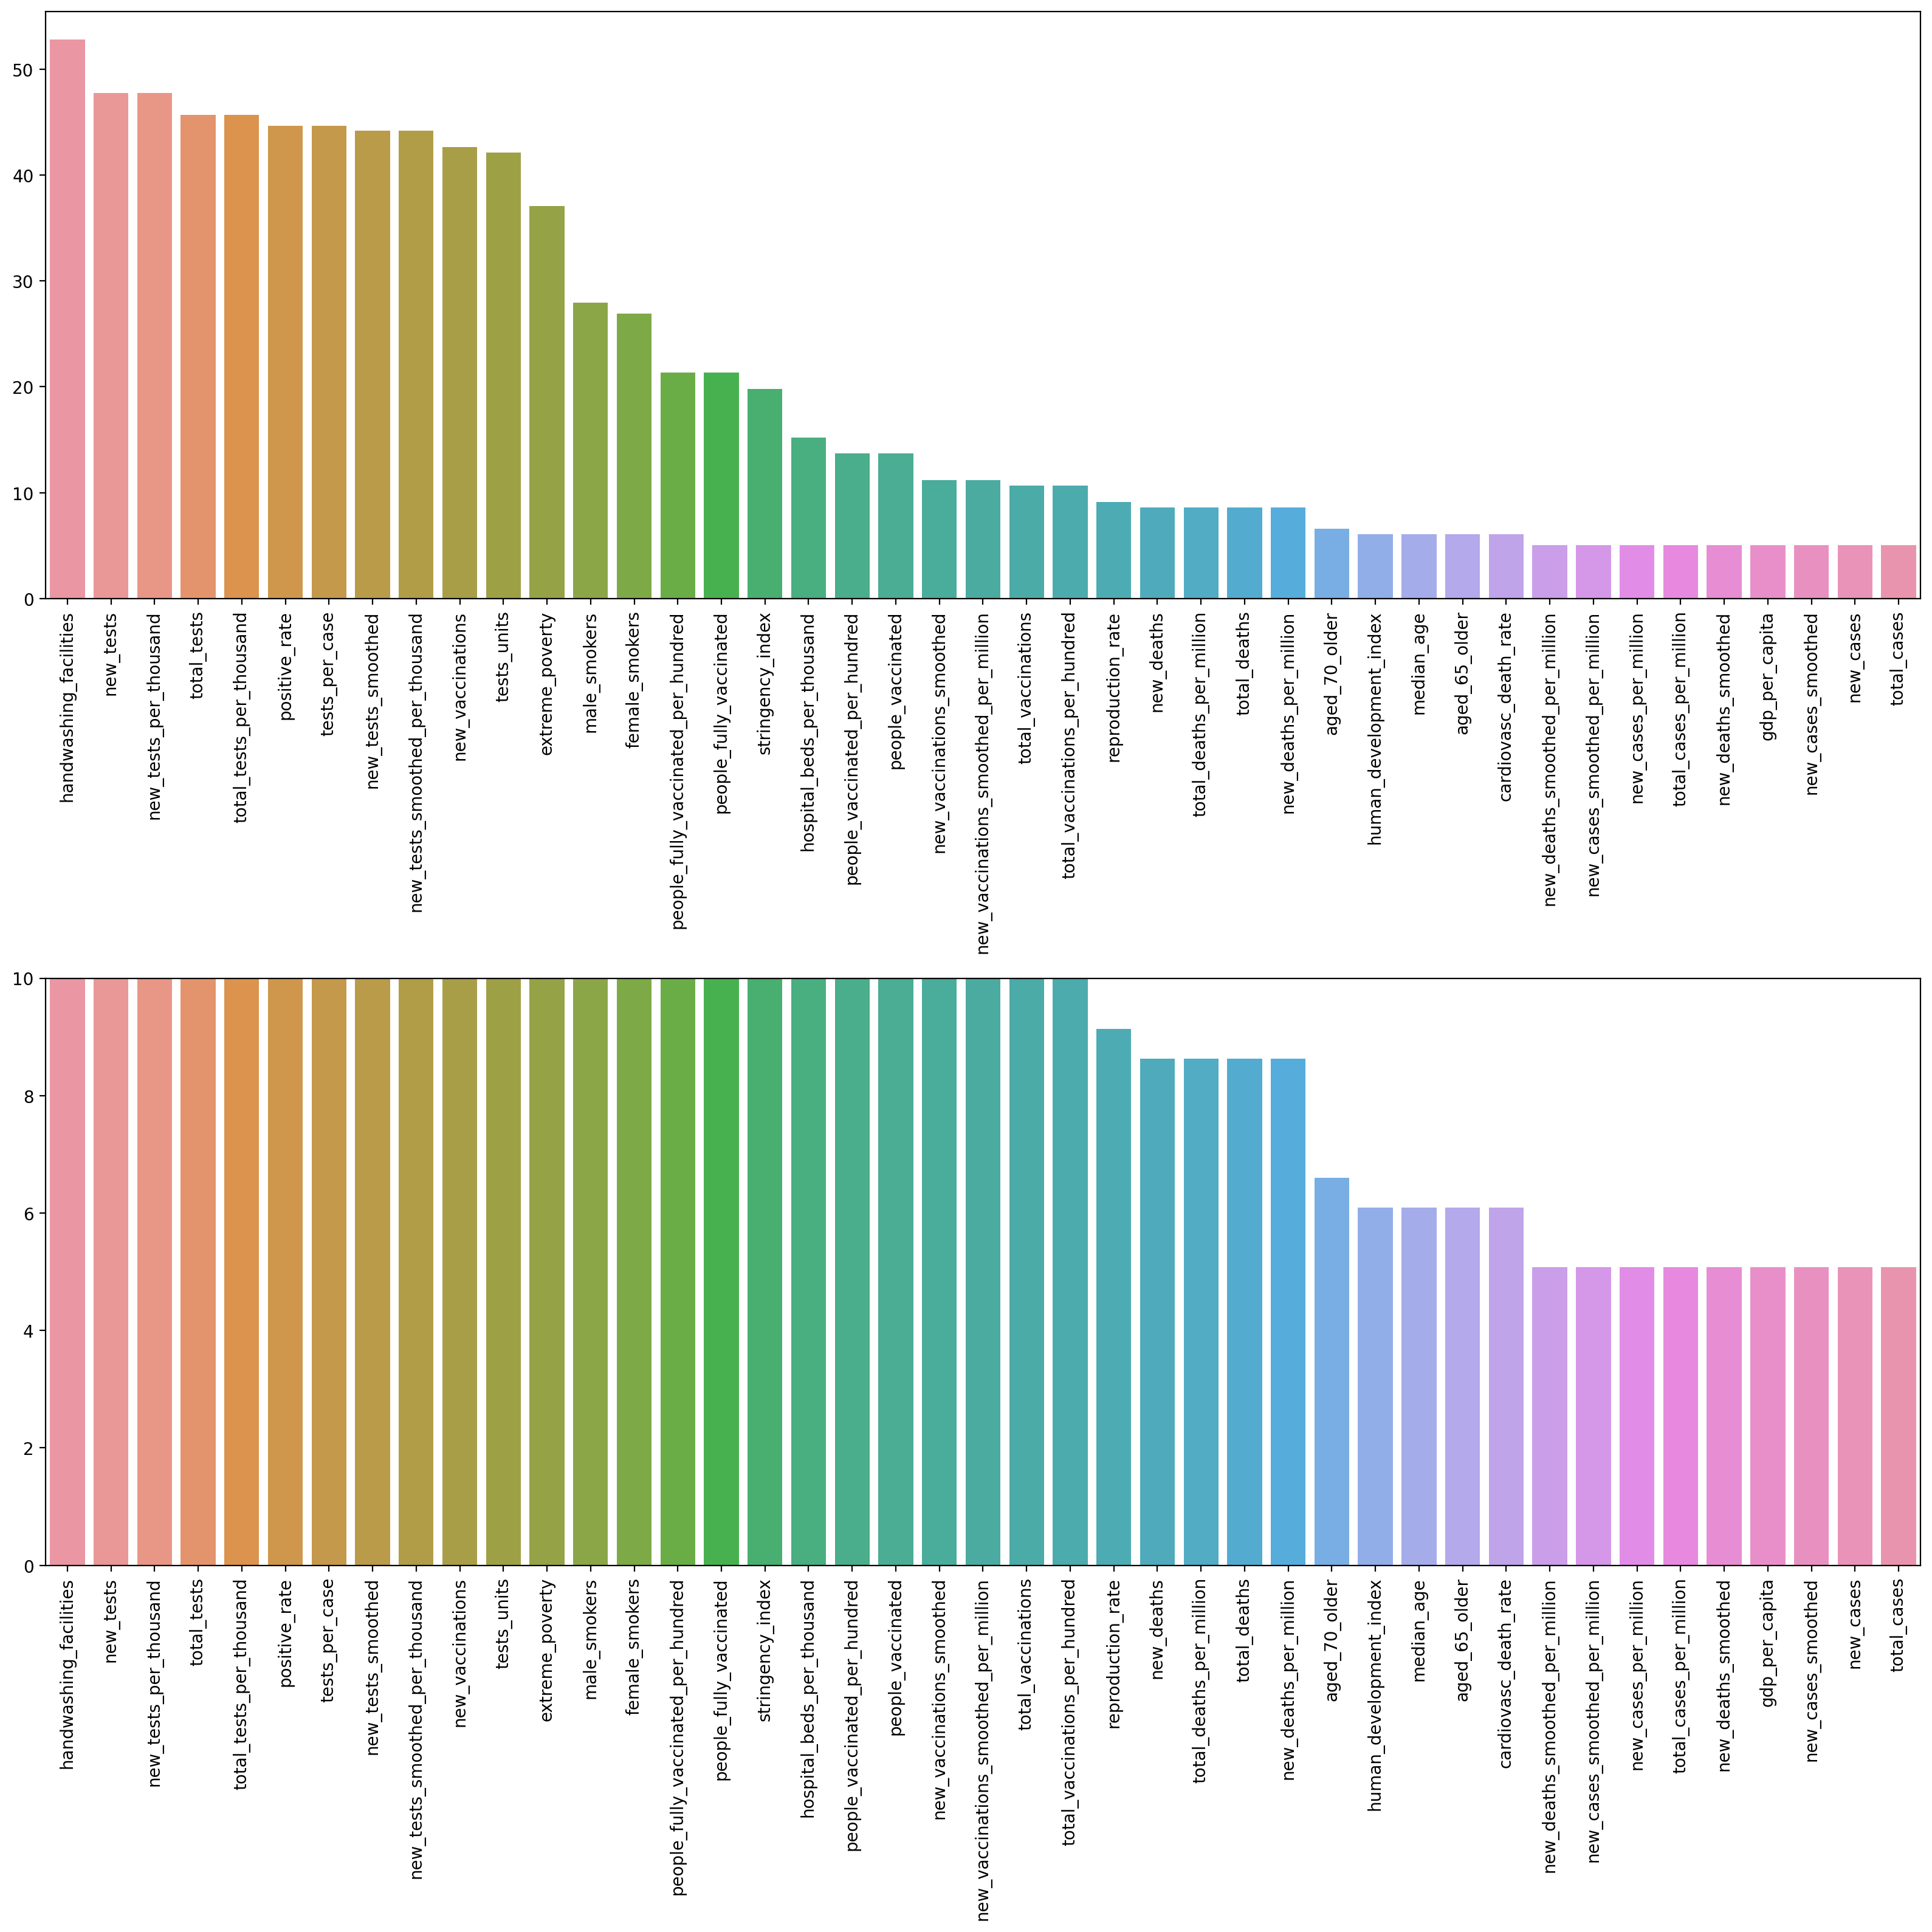

In [17]:
percent_nan = percent_missing(countries)

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 16), dpi=200)

for axes in ax:
    sns.barplot(x=percent_nan.index, y=percent_nan, ax=axes)
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

ax[1].set_ylim(0, 10)
plt.tight_layout()
plt.show();

In [18]:
len(countries)

197

We've been able to preserve a relatively large amount of our dataset after dropping rows and columns with mainly null values. We will use Data Interpolation to alleviate the remainder of our null values. Let us first visualize the distribution of each feature that contains null values.

In [19]:
features_to_interpolate = []

for feature in countries.columns:
    
    if countries[feature].isnull().sum() > 0:
        features_to_interpolate.append(feature)

We shall go through and interpolate each of null values for each column with the mean of the specified column.

In [20]:
features_to_interpolate

['total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'new_vaccinations_smoothed_per_million',
 'stringency_index',
 'median_age',
 'aged_65_older',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate',
 'female_smokers',
 'male_smokers',
 'handwashing_facilities',
 'hospital_beds

In [21]:
for feature in features_to_interpolate:
    try:
        countries[feature].mean()
    except TypeError:
        print(feature, "CONVERSION FAILED")

tests_units CONVERSION FAILED


In [22]:
countries.isnull().sum().sort_values(ascending=False) / len(countries) * 100

handwashing_facilities                   52.791878
new_tests                                47.715736
new_tests_per_thousand                   47.715736
total_tests_per_thousand                 45.685279
total_tests                              45.685279
positive_rate                            44.670051
tests_per_case                           44.670051
new_tests_smoothed                       44.162437
new_tests_smoothed_per_thousand          44.162437
new_vaccinations                         42.639594
tests_units                              42.131980
extreme_poverty                          37.055838
male_smokers                             27.918782
female_smokers                           26.903553
people_fully_vaccinated                  21.319797
people_fully_vaccinated_per_hundred      21.319797
stringency_index                         19.796954
hospital_beds_per_thousand               15.228426
people_vaccinated_per_hundred            13.705584
people_vaccinated              

About 40.61% of data would be missing if we simply dropped our tests_units feature. Since we will not use tests_units for any machine learning models or analysis we will assign those null entries a value of 0 in order to preserve the data while indicating that we have assigned placeholder for irrelevant data. 

In [23]:
temp_ser = pd.Series(data=[0 for item in countries["tests_units"].values], 
                     index=countries["tests_units"].index,
                     dtype=float)

countries["tests_units"] = temp_ser

Now that our data has been processed for interpolation, we shall use a groupby function to in order to fill each null value column with its respective feature average.

In [24]:
countries[countries["new_tests_smoothed"].isnull()]["new_tests_smoothed"]

AFG    None
DZA    None
AGO    None
ATG    None
ABW    None
       ... 
UZB    None
VUT    None
VEN    None
VNM    None
YEM    None
Name: new_tests_smoothed, Length: 87, dtype: object

In [25]:
for feature in features_to_interpolate:
    countries[feature] = countries[feature].transform(lambda value: value.fillna(value.mean()))

In [26]:
countries[countries["new_tests_smoothed"].isnull()]["new_tests_smoothed"]

Series([], Name: new_tests_smoothed, dtype: float64)

In [27]:
nan_count_column = countries.isnull().sum()
nan_count_column.sum(), len(countries)

(0, 197)

# Part I: Gaining Insight on Features Relative to USA

## Radarplots USA Against Various Countries
* Compares USA against various countries and compares a combination of features.
* Does not include entries marked with OWID prefixes those seem to indicate regional statistics

In [28]:
countries.head(3)

continent     location last_updated_date  total_cases  new_cases  \
AFG      Asia  Afghanistan        2021-06-02      74026.0     1049.0   
ALB    Europe      Albania        2021-06-02     132351.0       14.0   
DZA    Africa      Algeria        2021-06-02     129640.0      422.0   

     new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
AFG             897.571        3007.0        34.0               21.714   
ALB              15.286        2451.0         0.0                0.571   
DZA             284.857        3490.0        10.0                7.143   

     total_cases_per_million  ...  gdp_per_capita  extreme_poverty  \
AFG                 1901.597  ...        1803.987         13.98629   
ALB                45990.340  ...       11803.431          1.10000   
DZA                 2956.372  ...       13913.839          0.50000   

     cardiovasc_death_rate  diabetes_prevalence  female_smokers  male_smokers  \
AFG                597.029                 9.59       10.618056     32.941549   
ALB                304.195                10.08        7.100000     51.200000   
DZA                278.364                 6.73        0.700000     30.400000   

     handwashing_facilities  hospital_beds_per_thousand  life_expectancy  \
AFG               37.746000                        0.50            64.83   
ALB               49.946247                        2.89            78.57   
DZA               83.741000                        1.90            76.88   

     human_development_index  
AFG                    0.511  
ALB                    0.795  
DZA                    0.748  

[3 rows x 50 columns]

In [29]:
(countries.loc["AFG"]["new_deaths"] - countries["new_deaths"].mean()) / countries["new_deaths"].std()

-0.0811630274296937

In [30]:
# Setting Canvas Style for Plots
import plotly.graph_objects as go
plt.style.use("ggplot")

In [31]:
numerical = countries.drop(["continent", "location", "last_updated_date"], axis=1)

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
norm = pd.DataFrame(scaler.fit_transform(numerical))

In [35]:
norm.head(3)

0         1         2         3         4         5         6   \
0 -0.247623 -0.124770 -0.130287 -0.270993 -0.081370 -0.133158 -0.842945   
1 -0.230494 -0.210174 -0.202931 -0.279613 -0.085509 -0.208588  0.301815   
2 -0.231291 -0.176508 -0.180736 -0.263504 -0.084292 -0.185142 -0.815558   

         7         8         9   ...        37            38        39  \
0 -0.331937 -0.327598 -0.715437  ... -0.885149  2.215211e-16  2.838559   
1 -0.459686 -0.411615  0.258316  ... -0.363861 -8.034941e-01  0.345315   
2 -0.432160 -0.406010 -0.712490  ... -0.253842 -8.409057e-01  0.125385   

         40            41            42        43        44        45  \
0  0.257381 -7.881700e-16 -1.223047e-15 -0.555358 -1.114471 -1.102706   
1  0.359902 -3.902405e-01  1.571400e+00  0.000000 -0.049491  0.735135   
2 -0.341008 -1.100161e+00 -2.187366e-01  1.538344 -0.490633  0.509083   

         46  
0 -1.478801  
1  0.490086  
2  0.164249  

[3 rows x 47 columns]

In [36]:
norm.index = numerical.index
norm.columns = numerical.columns

In [37]:
temp = norm[["gdp_per_capita", "cardiovasc_death_rate", "male_smokers", "female_smokers", "extreme_poverty"]]

### Comparing USA to other Countries

In [38]:
comp = temp.loc[["USA", "CHN", "RUS", "GBR", "AUS", "CAN"]]
comp

gdp_per_capita  cardiovasc_death_rate  male_smokers  female_smokers  \
USA        1.847673              -0.958258     -0.717909        0.940860   
CHN       -0.181124              -0.014801      1.330420       -0.967051   
RUS        0.311898               1.427486      2.182457        1.417838   
GBR        1.093212              -1.204761     -0.709303        1.040693   
AUS        1.348421              -1.326906     -1.415030        0.264217   
CAN        1.315519              -1.345569     -1.406424        0.153292   

     extreme_poverty  
USA        -0.797259  
CHN        -0.828435  
RUS        -0.865847  
GBR        -0.859612  
AUS        -0.840906  
CAN        -0.840906

In [39]:
# RADARPLOTS
categories = comp.columns

fig = go.Figure()

for country in ["USA", "CHN", "RUS"]:
    fig.add_trace(go.Scatterpolar(r=comp.loc[country].values,
                                  theta=categories,
                                  fill='toself',
                                  name=country))
    
fig.update_layout(title="USA | CHINA | RUSSIA")


fig.show();

In [40]:
# RADARPLOTS
categories = comp.columns

fig = go.Figure()

for country in ["USA", "GBR", "CAN"]:
    fig.add_trace(go.Scatterpolar(r=comp.loc[country].values,
                                  theta=categories,
                                  fill='toself',
                                  name=country,
          
    ))
    
fig.update_layout(title="USA | Great Britain | Canada")


fig.show();

In [41]:
# RADARPLOTS
categories = comp.columns

fig = go.Figure()

for country in ["USA", "AUS"]:
    fig.add_trace(go.Scatterpolar(r=comp.loc[country].values,
                                  theta=categories,
                                  fill='toself',
                                  name=country,
          
    ))
    
fig.update_layout(title="USA | AUS")


fig.show();

In [42]:
# Removing CHI and IND since there populations are much larger than the rest of the world.
# Only Removing to get a clearer picture of the other countries
countries_exclude_chn_ind = countries.drop(["CHN", "IND"], axis=0)

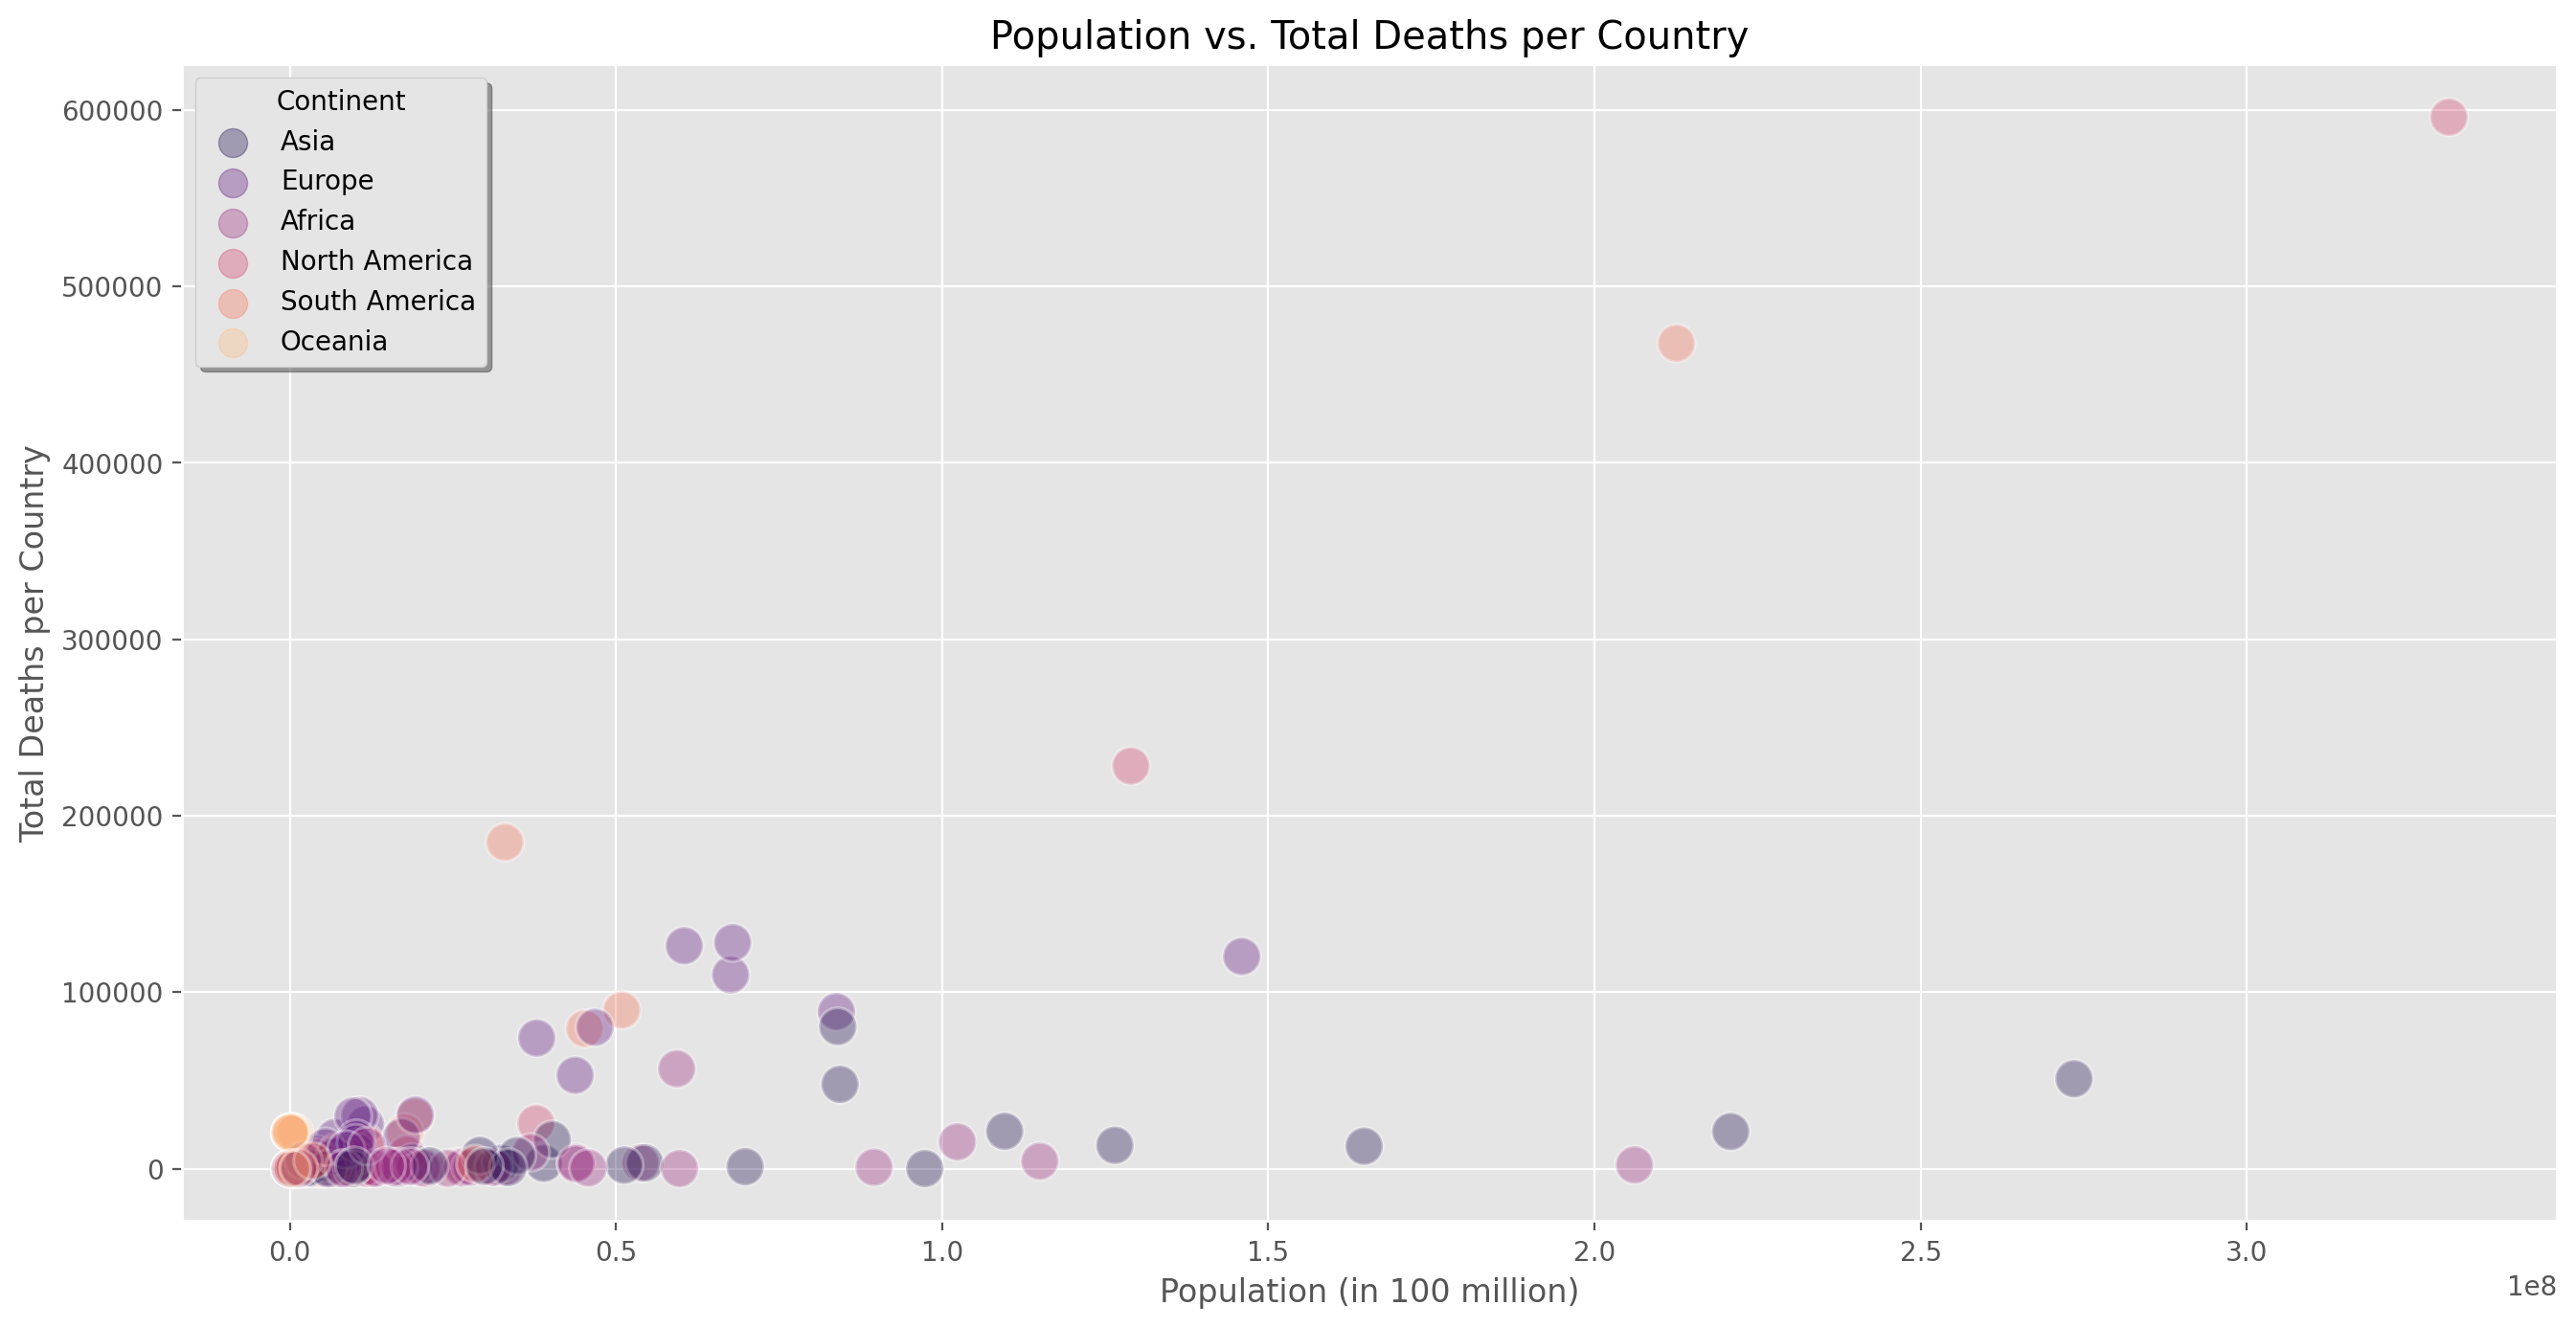

In [43]:
# REFINED SCATTERPLOT
plt.figure(figsize=(16, 8), dpi=200)

pop_deaths_scatter = sns.scatterplot(x="population", 
                y="total_deaths", 
                hue="continent",
                palette="magma",
                alpha=0.35,
                s=200, 
                data=countries_exclude_chn_ind)

plt.legend(title="Continent", 
           shadow=True, 
           markerscale=1.80)

for lh in pop_deaths_scatter.legend_.legendHandles:
    lh.set_alpha(0.35)

plt.title("Population vs. Total Deaths per Country")
plt.xlabel("Population (in 100 million)")
plt.ylabel("Total Deaths per Country")
# plt.gca().invert_yaxis()

plt.show();

## Boxplots Measuring Central Tendency of Deaths By Region
* Using Data Frame to coagulate deaths by Region.
* Since some regions will most likely have some outliers, we will have to resize our graph more than likely. 

In [44]:
countries.dropna(axis=0, subset=["total_deaths"], inplace=True)

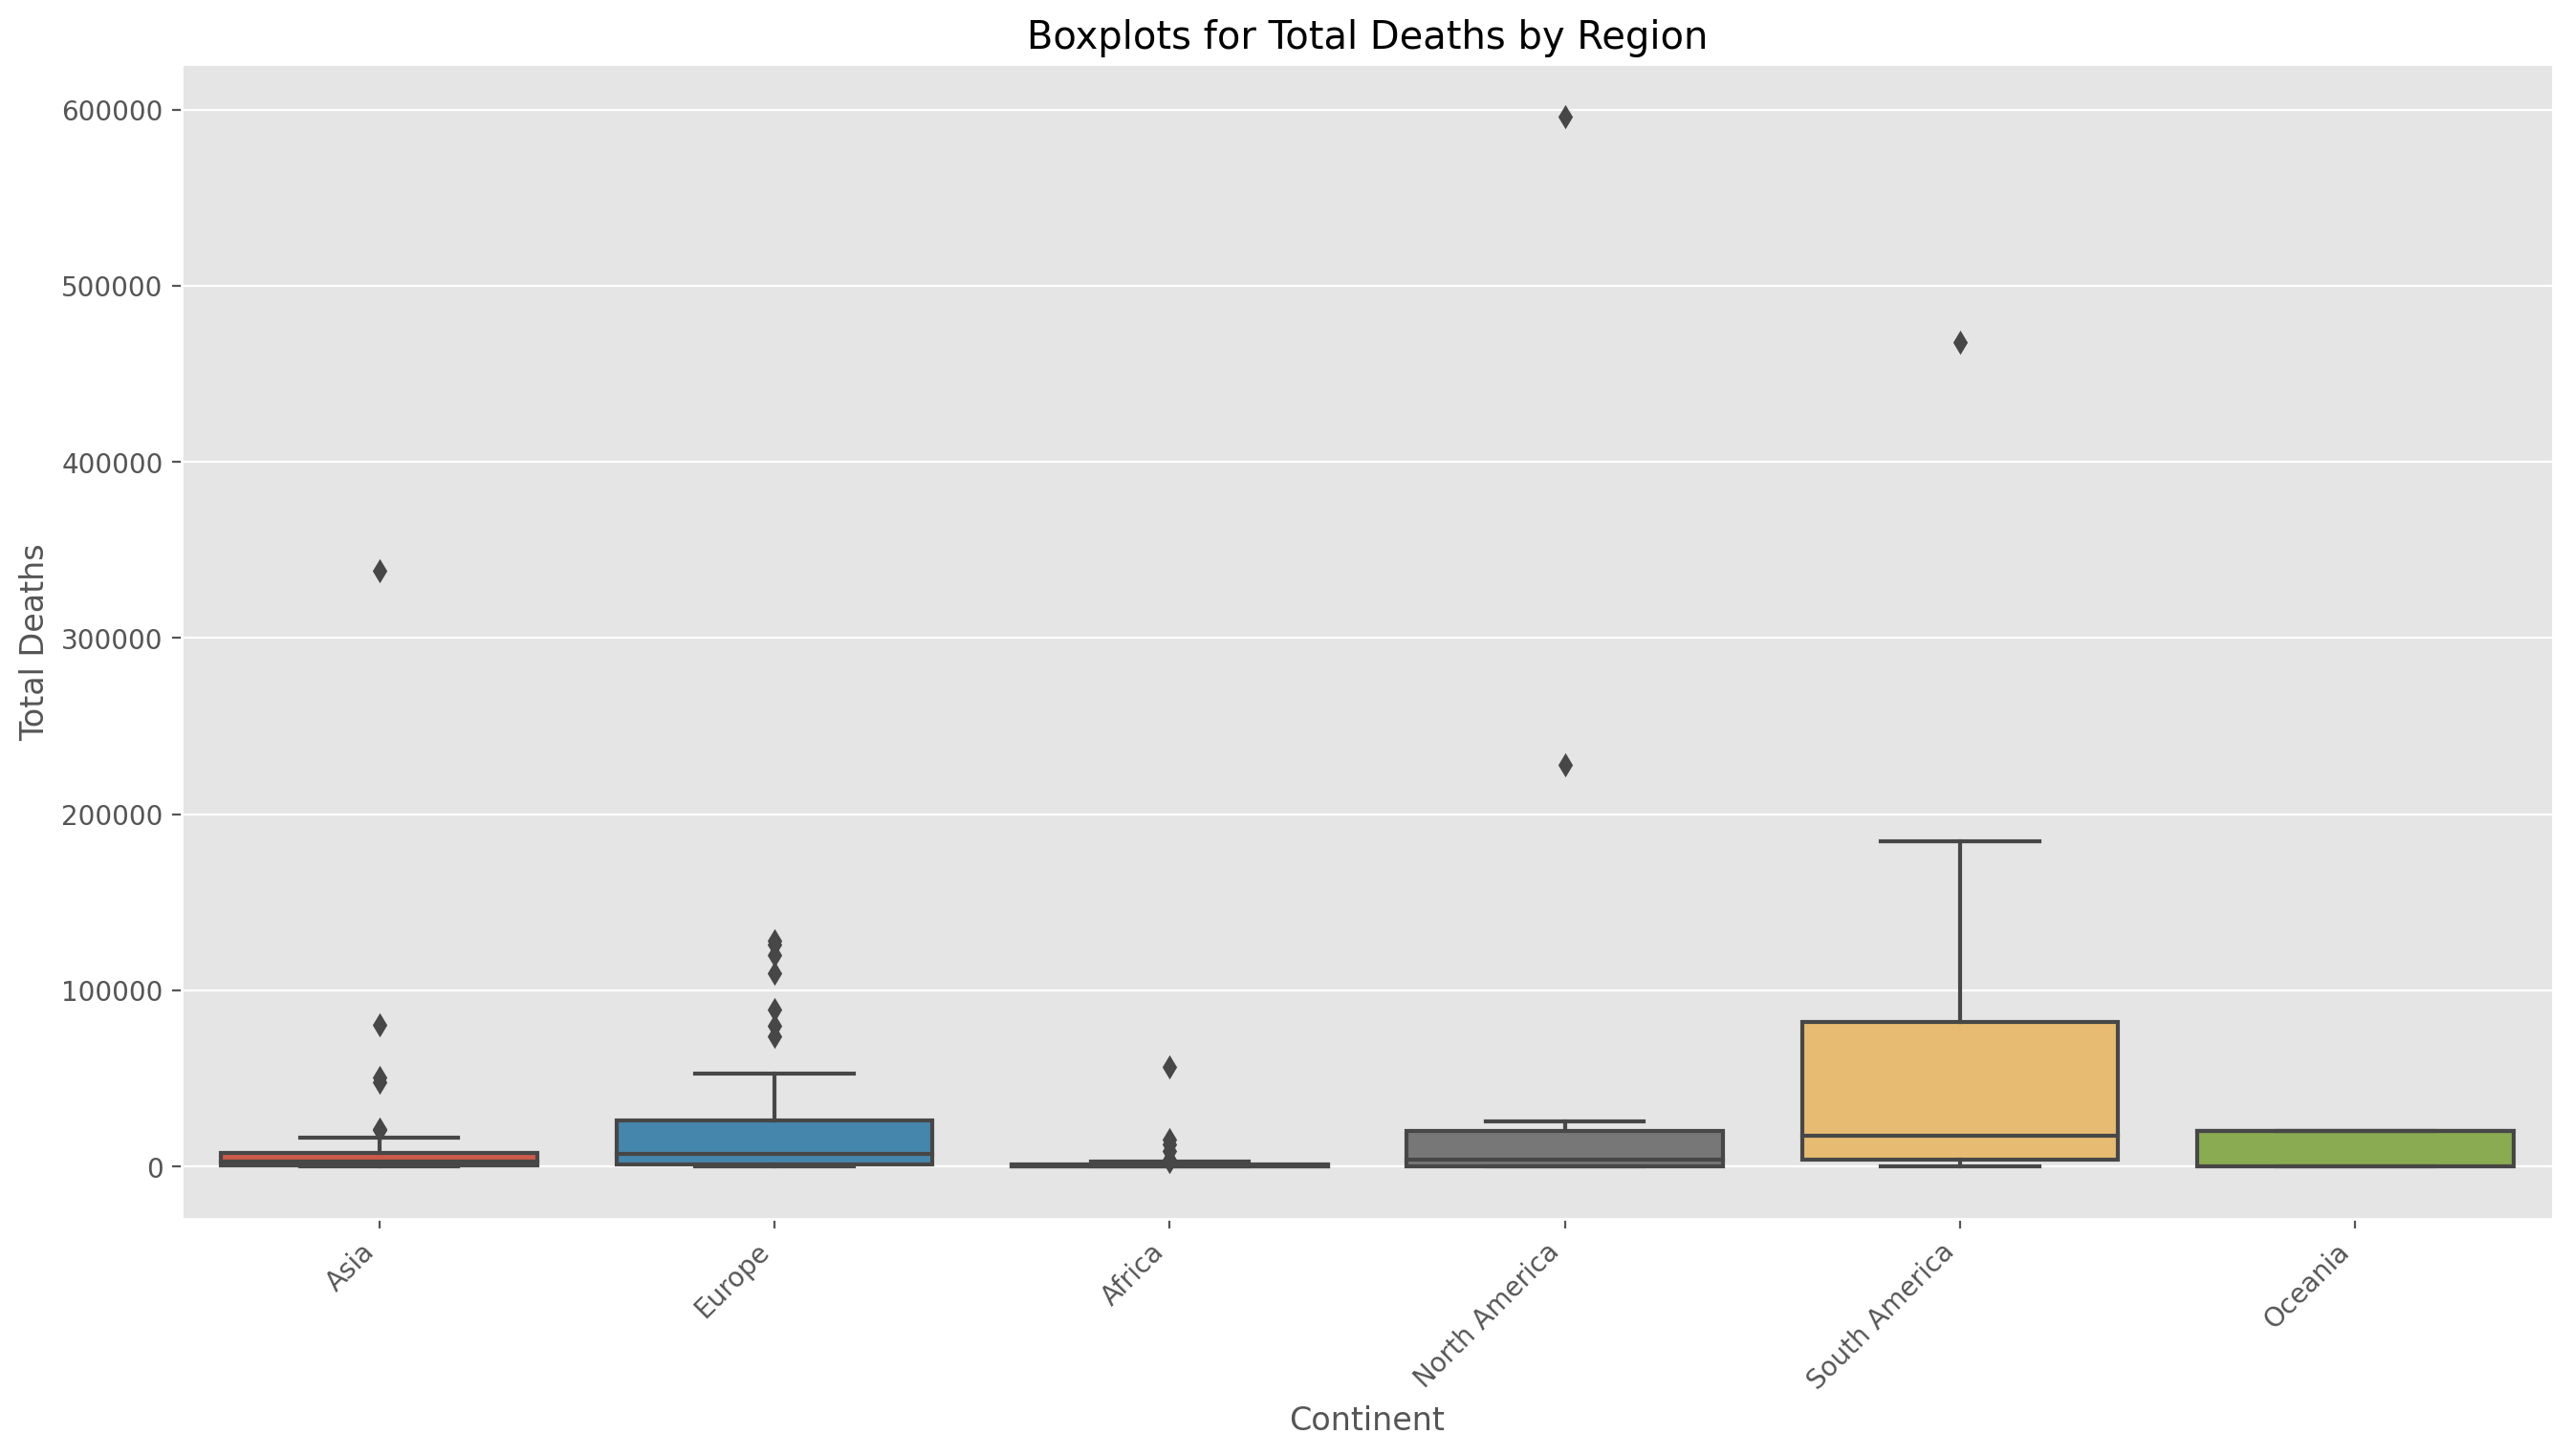

In [45]:
# RAW BOXPLOT
plt.figure(figsize=(16, 8), dpi=200)
sns.boxplot(data=countries, x="continent", y="total_deaths", orient="v")

plt.title("Boxplots for Total Deaths by Region")
plt.xlabel("Continent")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")

plt.show();

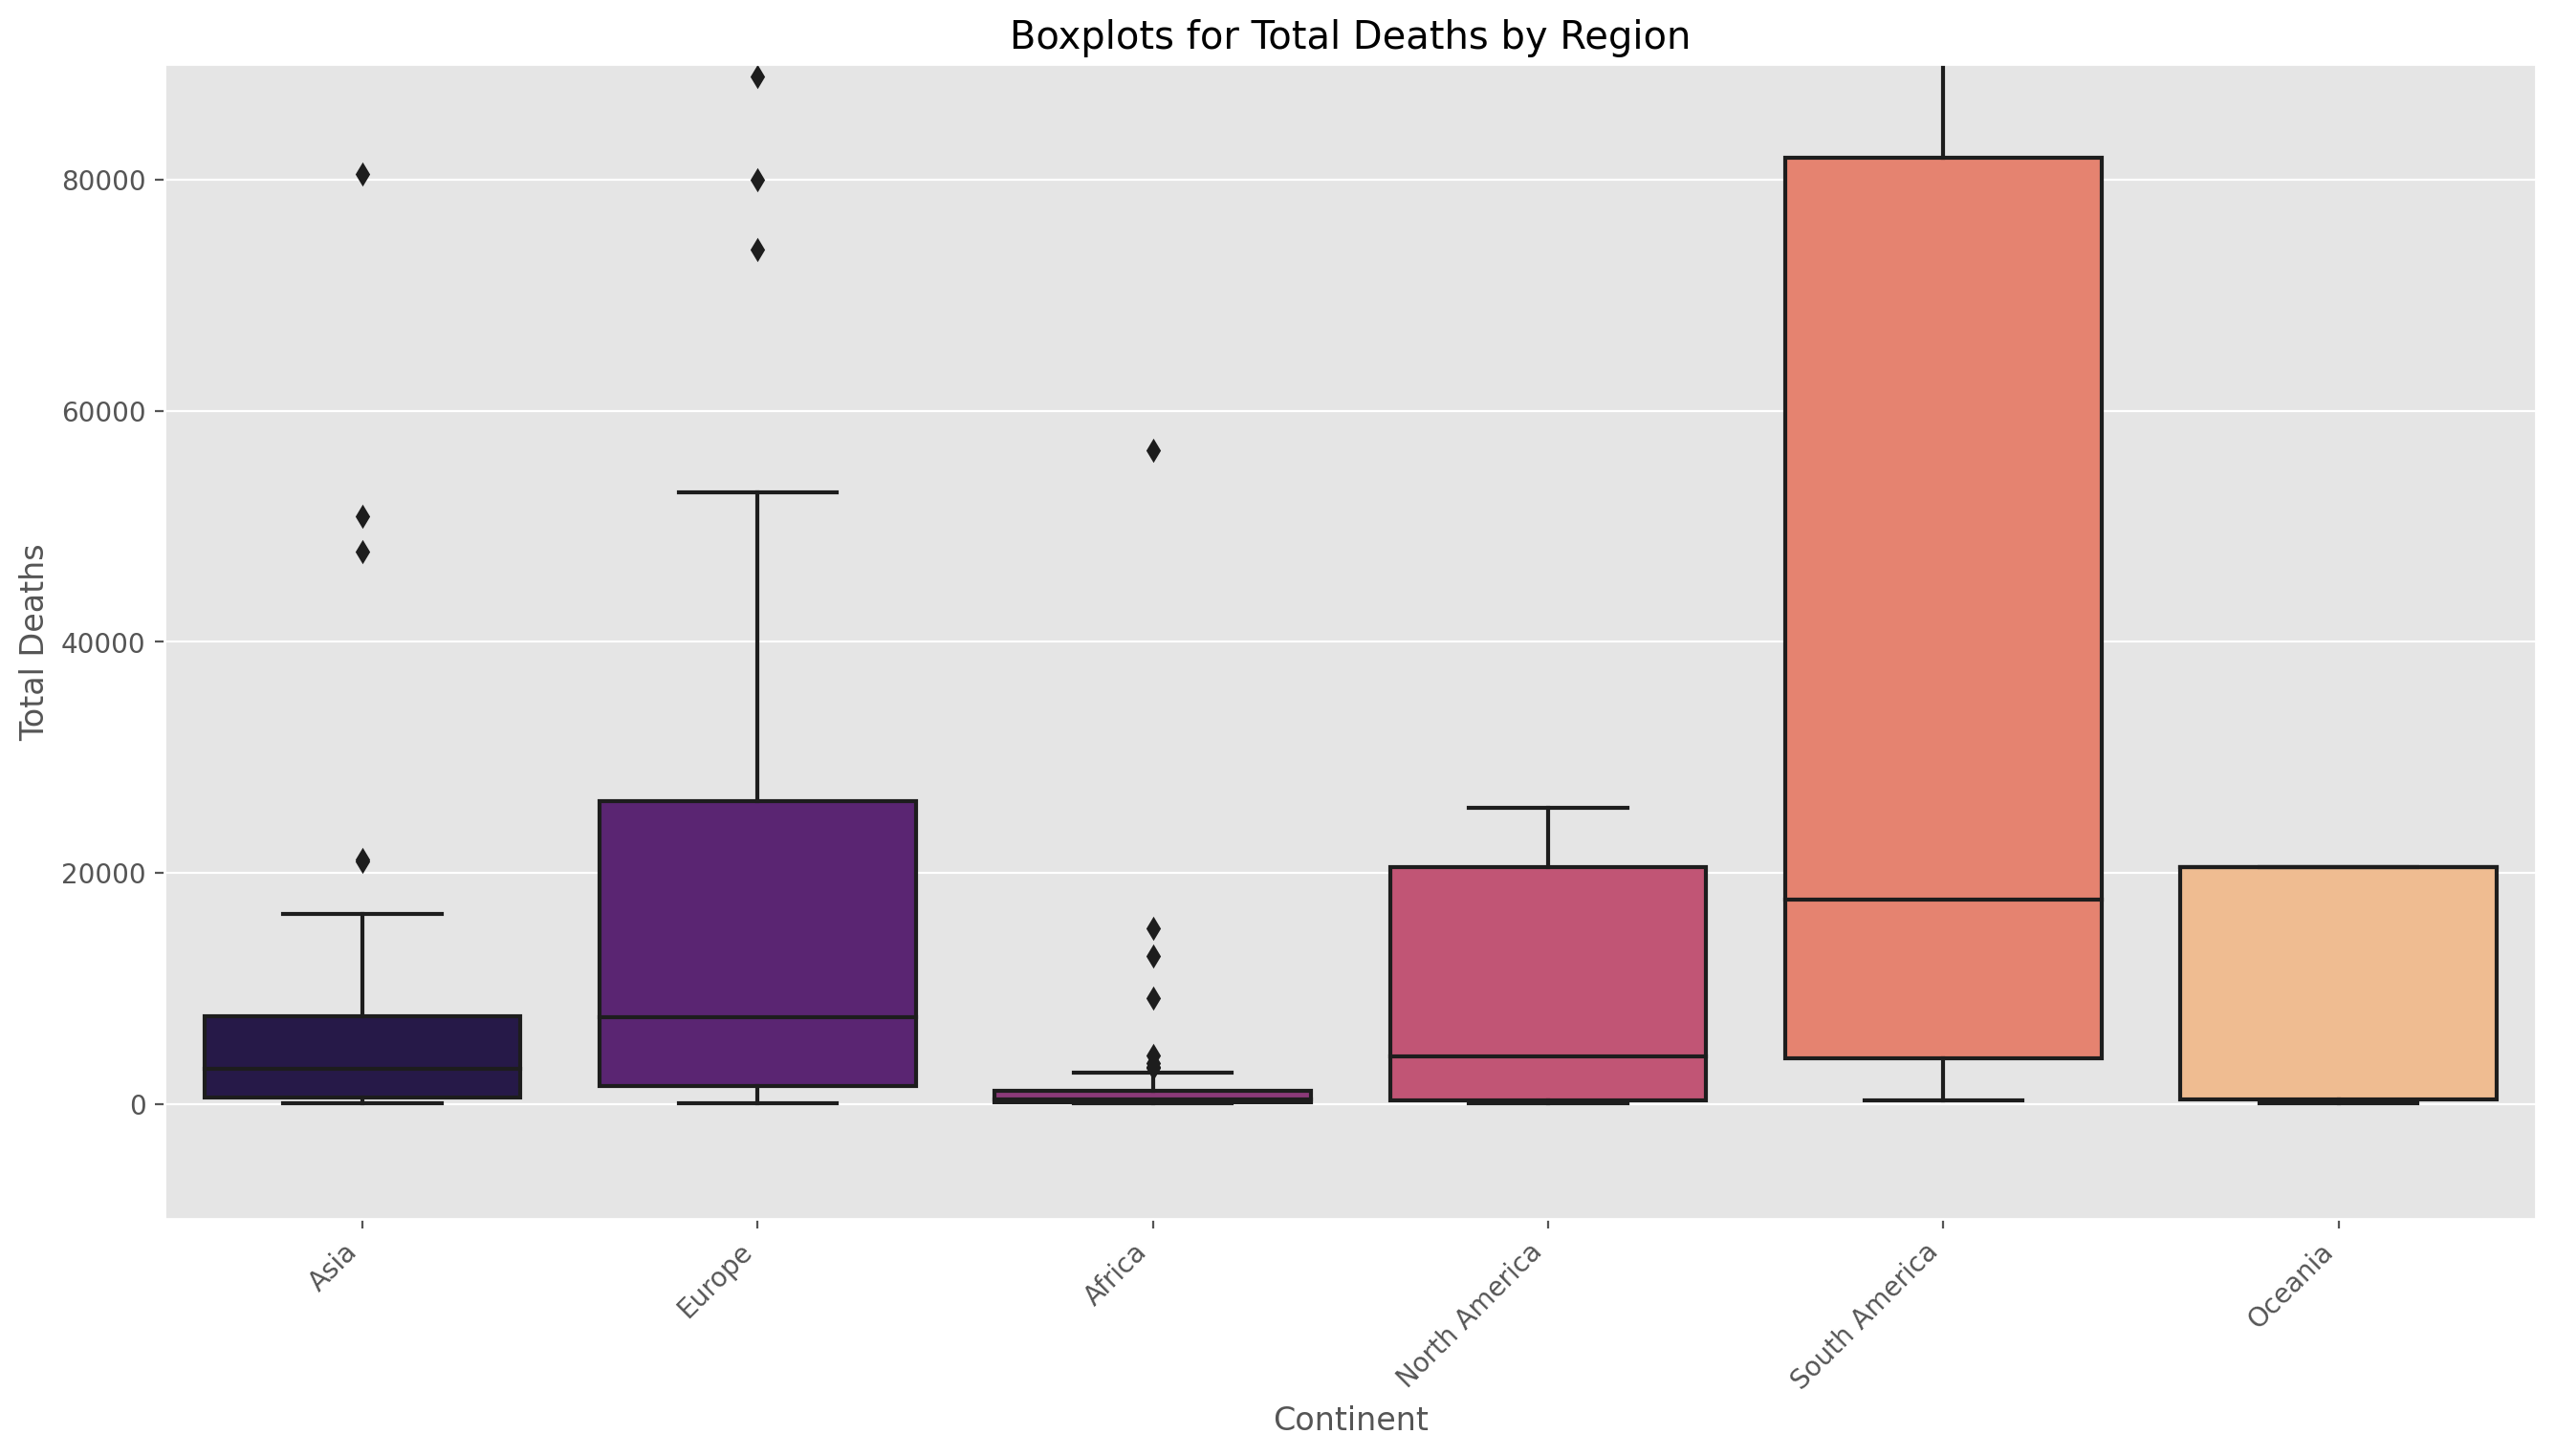

In [46]:
# Limiting y-axis to exclude major outliers
# REFINED BOXPLOT
plt.figure(figsize=(16, 8), dpi=200)
sns.boxplot(data=countries, x="continent", y="total_deaths", palette="magma", orient="v")

plt.title("Boxplots for Total Deaths by Region")
plt.xlabel("Continent")
plt.ylabel("Total Deaths")
plt.xticks(rotation=45, ha="right")
plt.ylim(-10000, 90000)

plt.show();

# Part II: Searching for Linear Relationships Between Features

## Analyzing relationship between Population Density and Total Cases

Let us see if there is a linear correlation between Population Density and Total Cases.

In [108]:
density_cases = countries[["population_density", "total_cases", "continent"]]
density_cases.head()

population_density  total_cases continent
AFG             54.422      74026.0      Asia
ALB            104.871     132351.0    Europe
DZA             17.348     129640.0    Africa
AND            163.755      13744.0    Europe
AGO              23.89      34960.0    Africa

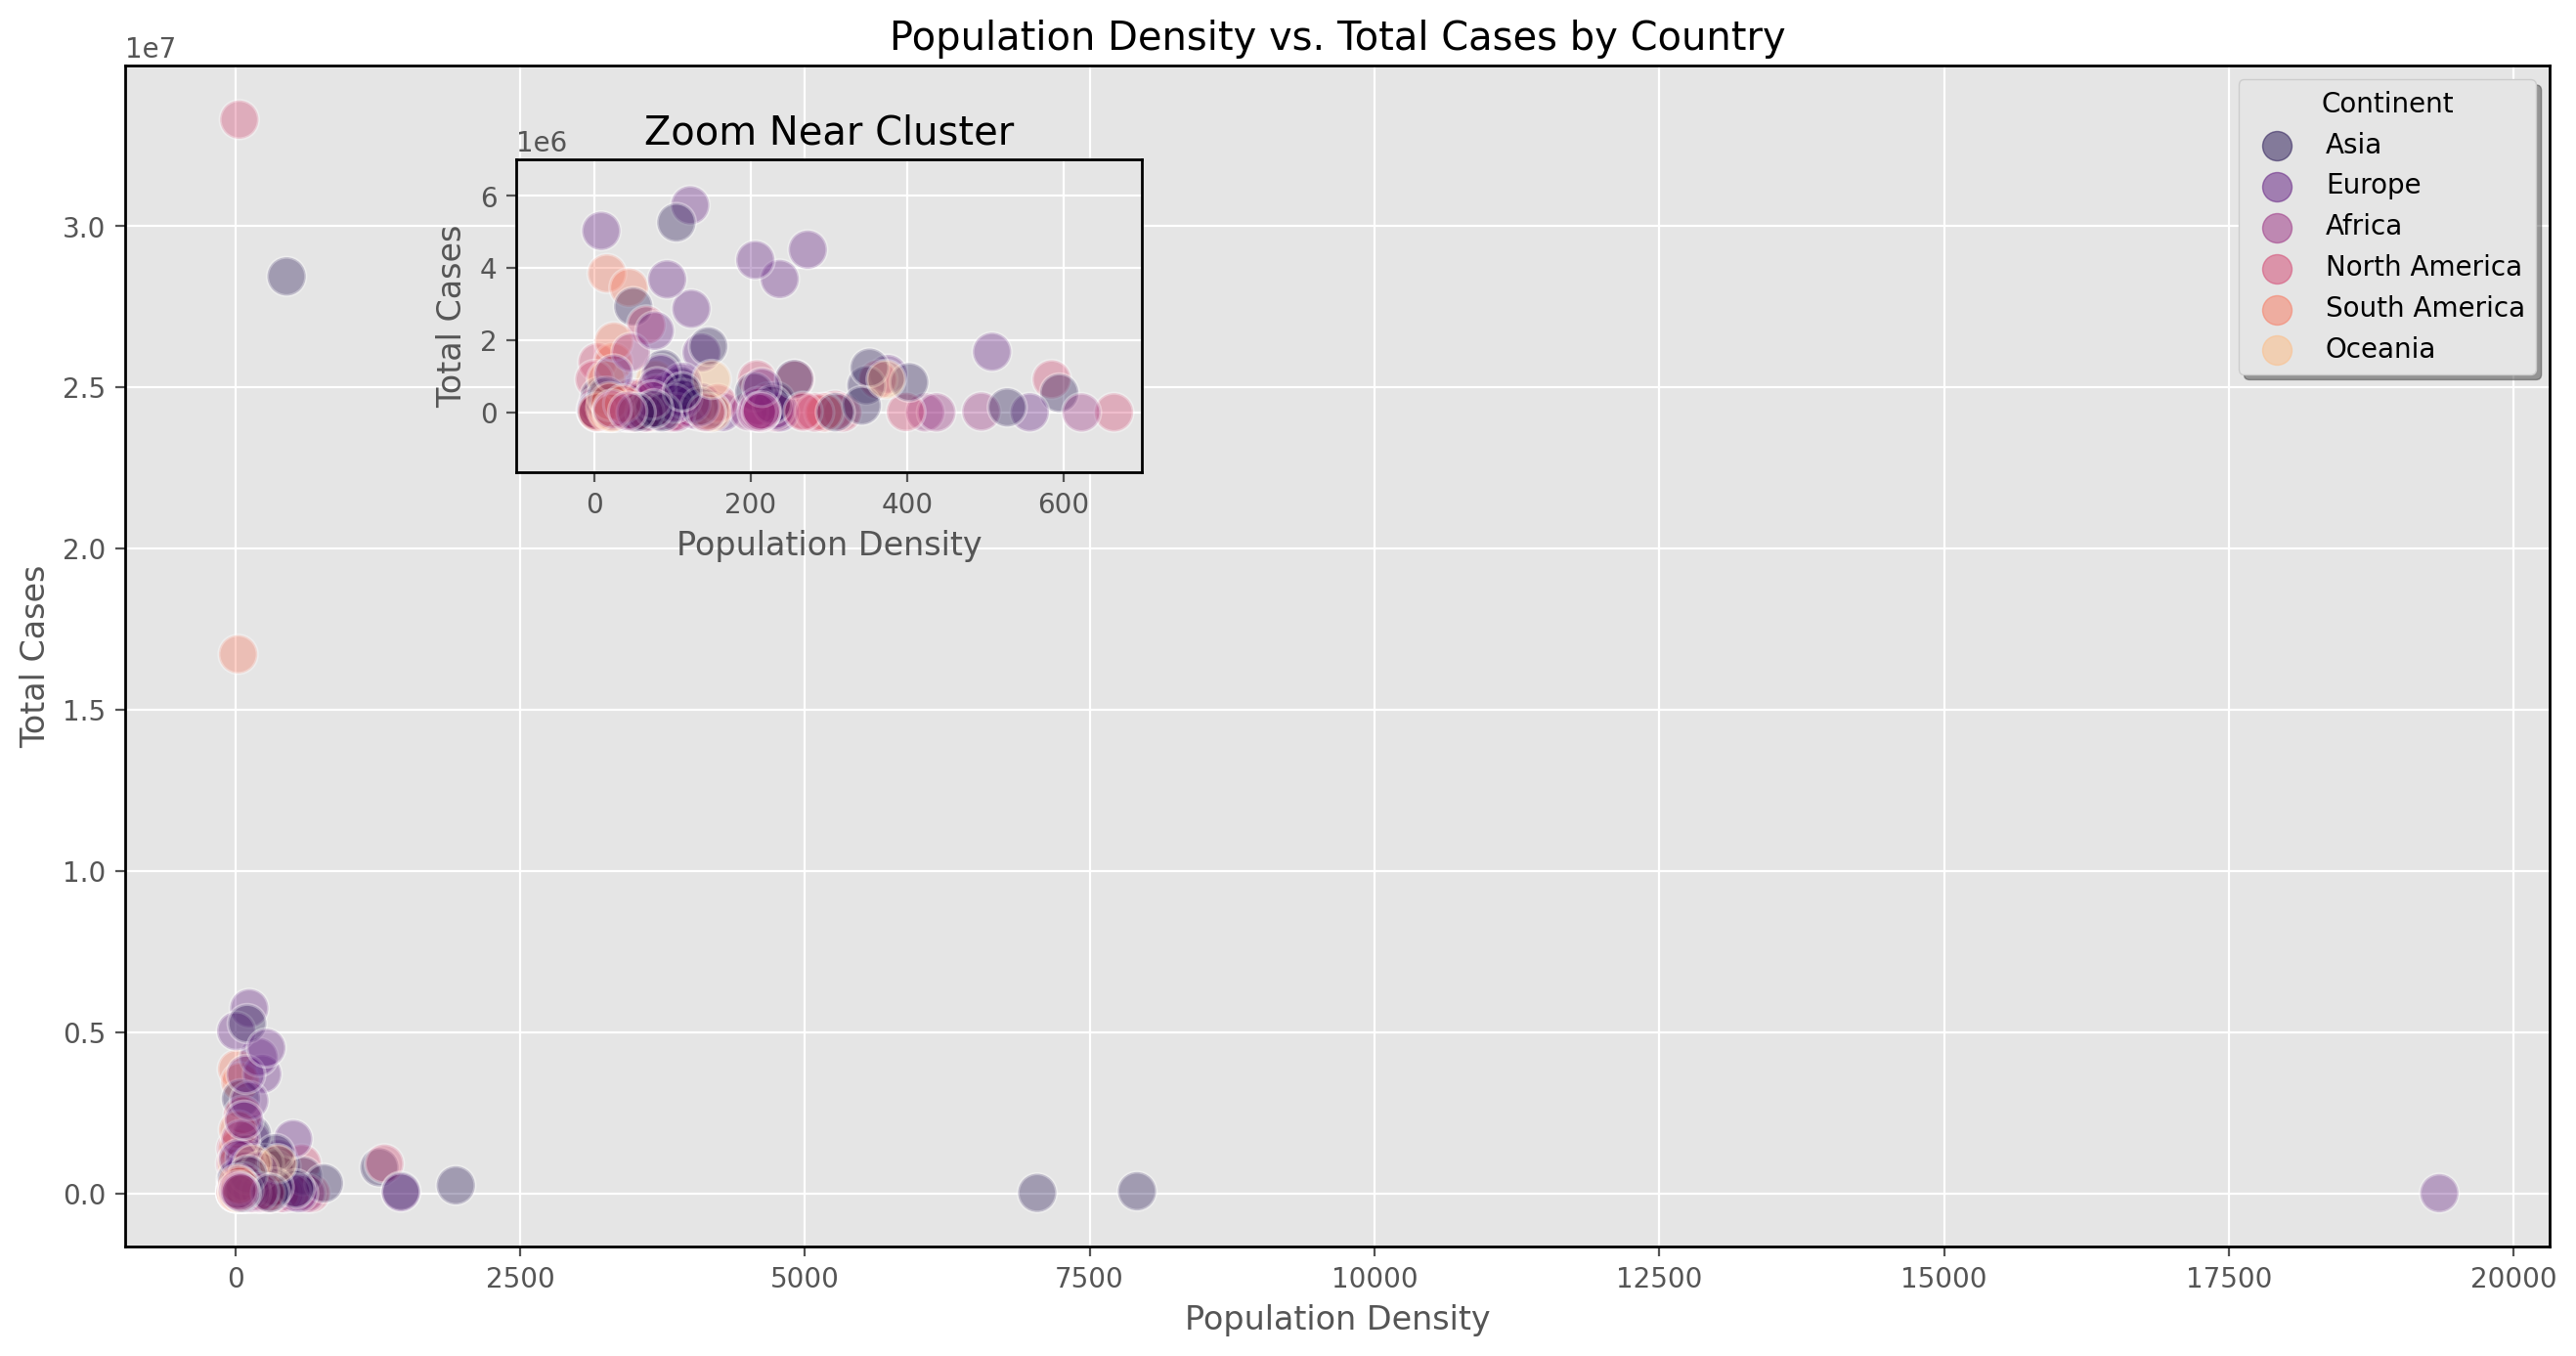

In [48]:
# Creating subplots

fig, ax = plt.subplots(figsize=(16, 8), dpi=200)



# Creating bigger scatterplot with appropriate legend

density_cases_scatter = sns.scatterplot(x="population_density", 
                                        y="total_cases",
                                        hue="continent",
                                        data=density_cases,
                                        alpha=0.35,
                                        s=200,
                                        palette="magma",
                                        ax=ax)

ax.legend(title="Continent",
          shadow=True,
          markerscale=1.80,)

for lh in density_cases_scatter.legend_.legendHandles:
    lh.set_alpha(0.50)

ax.set_title("Population Density vs. Total Cases by Country")
ax.set_xlabel("Population Density")
ax.set_ylabel("Total Cases")
for spine in ["bottom", "top", "left", "right"]:
    ax.spines[spine].set_edgecolor("black") 



# Adding a new axes to create a zoomed in scatterplot

density_cases_zoom = plt.axes([0.25, 0.62, 0.20, 0.20])

sns.scatterplot(x="population_density", 
                y="total_cases", 
                hue="continent", 
                data=density_cases,
                alpha=0.35,
                s=200,
                legend=False,
                palette="magma",
                ax=density_cases_zoom)

density_cases_zoom.set_title("Zoom Near Cluster")
density_cases_zoom.set_xlabel("Population Density")
density_cases_zoom.set_ylabel("Total Cases")
density_cases_zoom.set_xlim(left=-100, right=700)
density_cases_zoom.set_ylim(top=.7e7)
for spine in ["bottom", "top", "left", "right"]:
    density_cases_zoom.spines[spine].set_edgecolor("black")



plt.show()

### Hypothesis Test
It does not appear, visually, that there is any definitive linear relationship between Population Density and Total Cases, but we can use Scipy to calculate the Pearson Correlation Coefficient between these two features to reveal statistical insight. We can define a hypothesis test with the null and alternative hypothesis as follows:

$H_0:$ There is no linear correlation between Population Density and Total Cases.
<br/>
$H_A:$ There is a linear correlation between Population Density and Total Cases.

In [49]:
sp.stats.pearsonr(density_cases.population_density, density_cases.total_cases)

(-0.02858406437073593, 0.6900959714068187)

### Conclusion
The correlation coefficient here is $r=-0.02858406437073593$ and the p-value is $p=0.6900959714068187$. The correlation coefficient implies that Population Density and Total Cases have a poor linear correlation. The p-value confirms this since it is much larger than $\alpha=0.05$ which is the commonly accepted threshold for significance levels. Therefore, we can conclude that sufficient evidence does not exist to support the claim that there is a linear correlation between population density and total cases. 

## Analyzing relationship between Total Vaccinations and Total Cases

Let us see if there is a linear correlation between Total Vaccinations and Total Cases.

In [93]:
vaccinations_cases = countries[["total_vaccinations", "total_cases", "continent"]]
vaccinations_cases.head()

total_vaccinations  total_cases continent
AFG        6.262900e+05      74026.0      Asia
ALB        7.803420e+05     132351.0    Europe
DZA        1.141567e+07     129640.0    Africa
AND        3.591600e+04      13744.0    Europe
AGO        9.092150e+05      34960.0    Africa

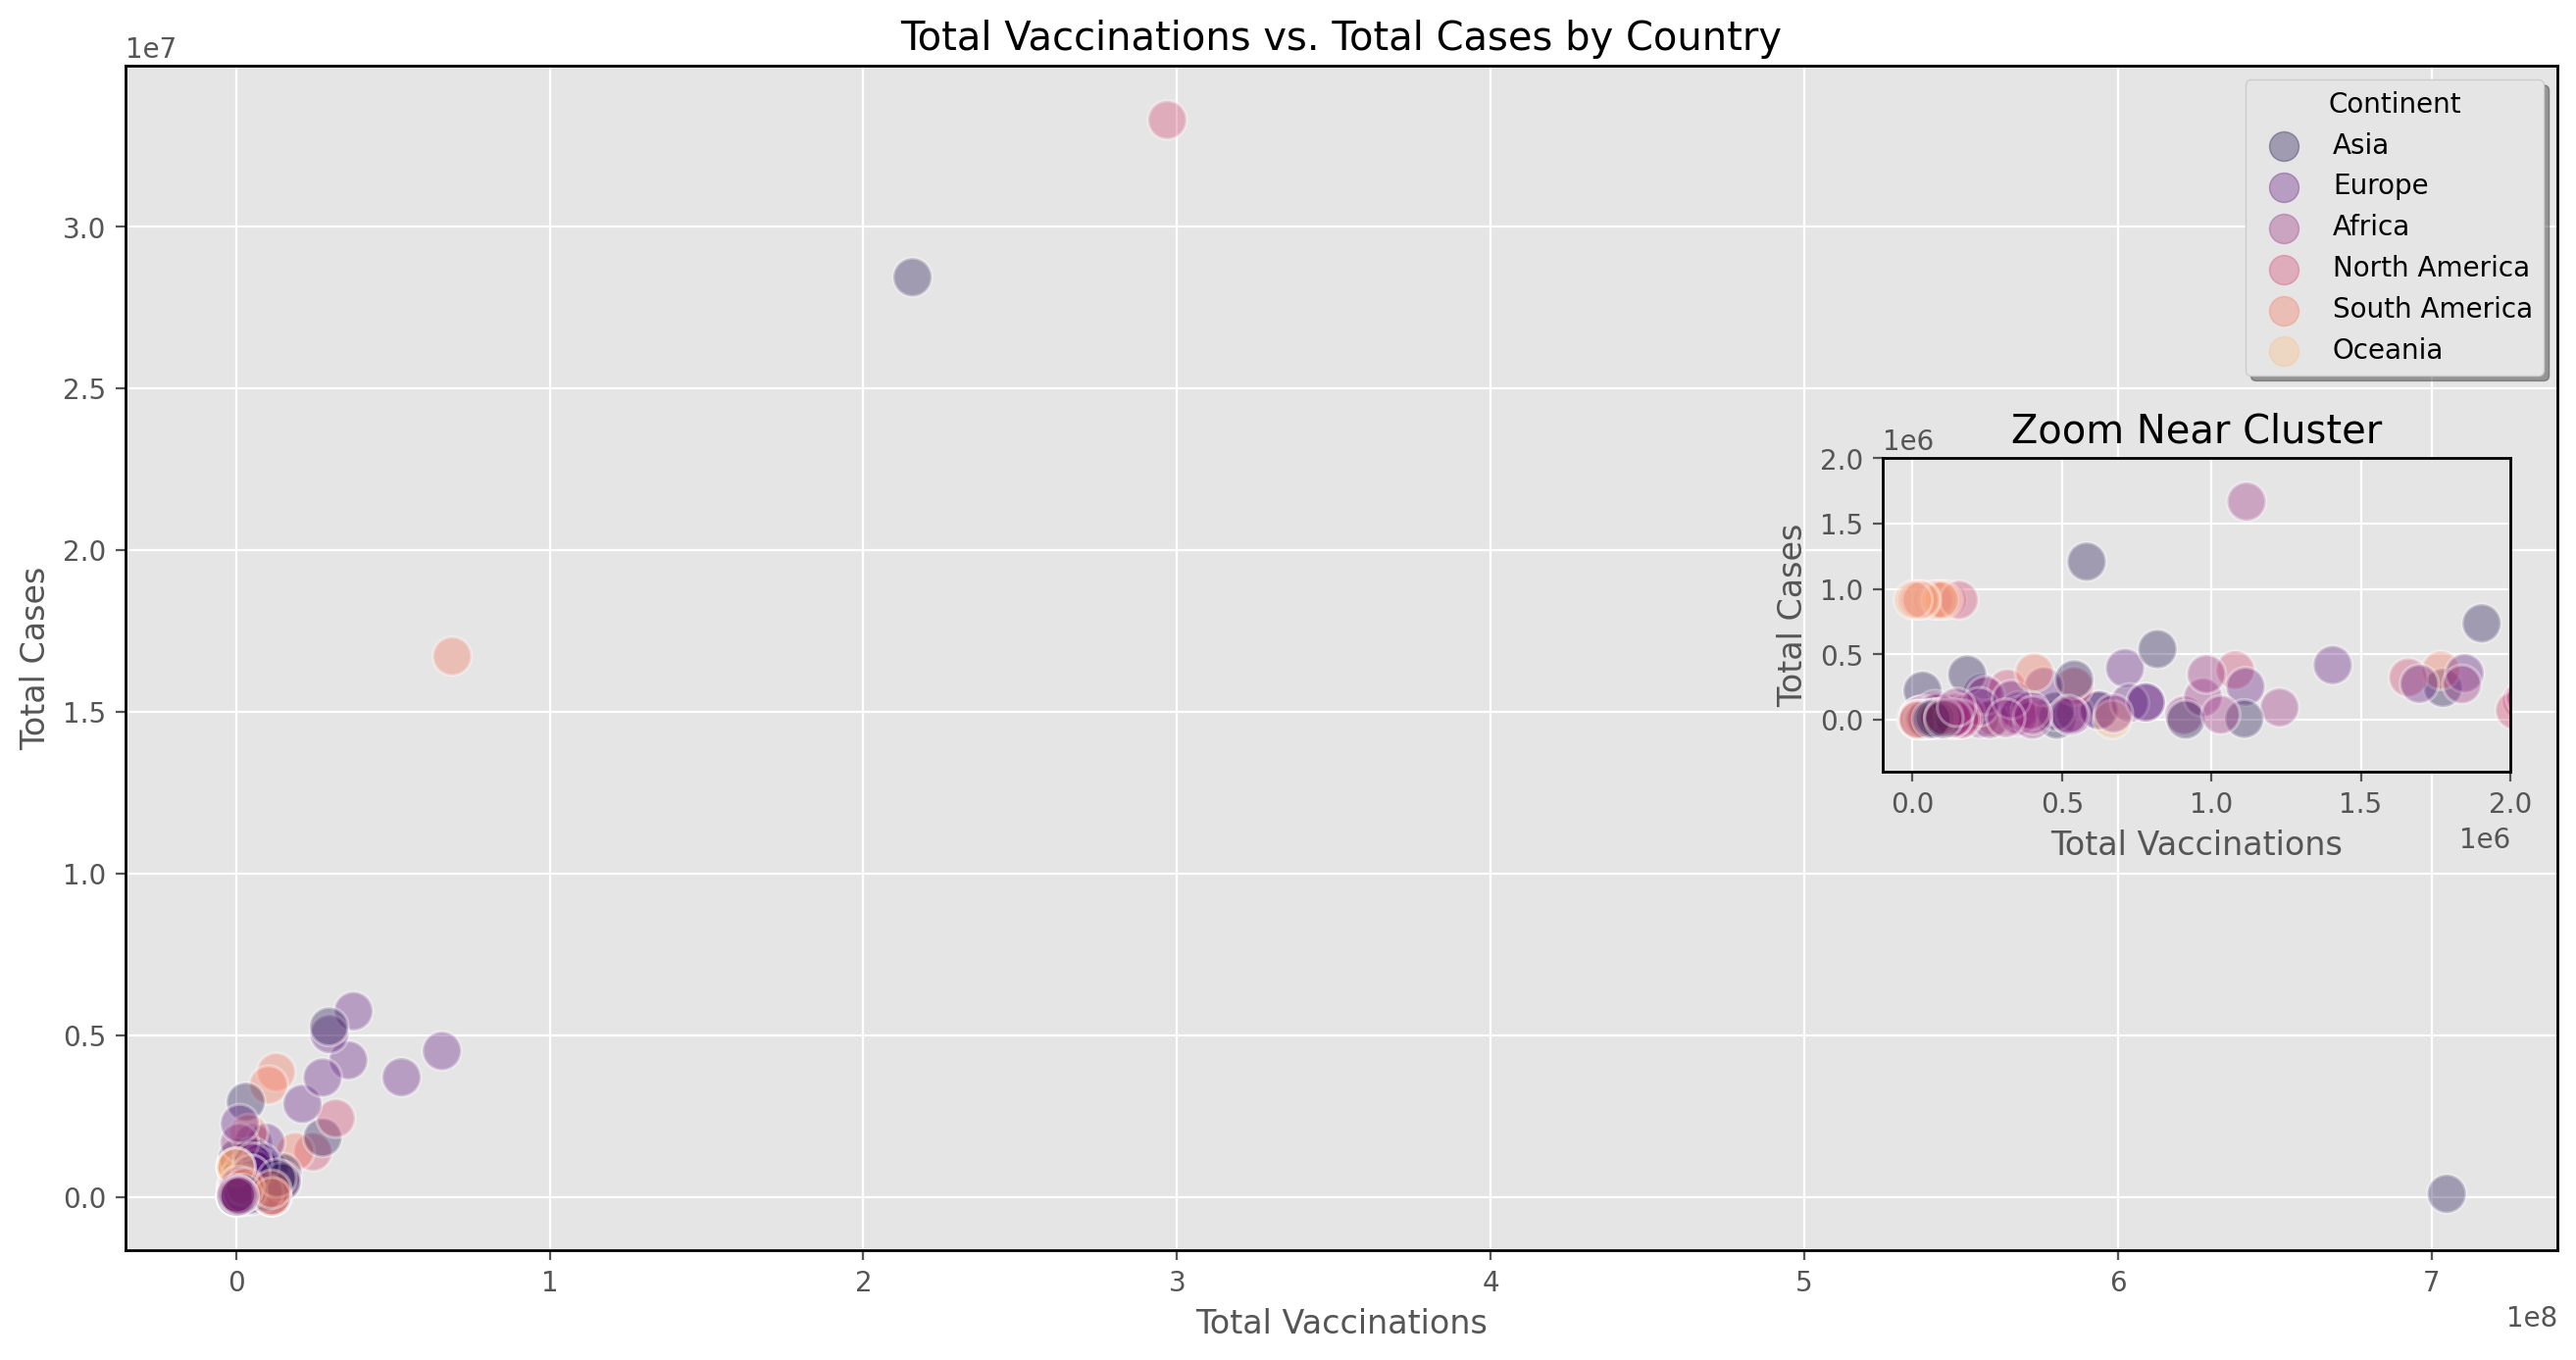

In [51]:
# Creating subplots 

fig, ax = plt.subplots(figsize=(16, 8), dpi=200)



# Configuring bigger scatterplot with its appropriate legend

vaccinations_cases_scatter = sns.scatterplot(x="total_vaccinations", 
                                             y="total_cases", 
                                             hue="continent",
                                             data=vaccinations_cases,
                                             alpha = 0.35,
                                             s=200,
                                             palette="magma",
                                             ax=ax)

ax.legend(title="Continent", 
           shadow=True,
           markerscale=1.8)

for lh in ax.legend_.legendHandles:
    lh.set_alpha(0.35)

ax.set_title("Total Vaccinations vs. Total Cases by Country")
ax.set_xlabel("Total Vaccinations")
ax.set_ylabel("Total Cases")
for spine in ["bottom", "top", "left", "right"]:
    ax.spines[spine].set_edgecolor("black")



# Adding a new axes to create a zoomed in scatterplot

vaccinations_cases_zoom = plt.axes([0.685, 0.43, 0.20, 0.20])

sns.scatterplot(x="total_vaccinations", 
                y="total_cases", 
                hue="continent",
                data=vaccinations_cases,
                alpha=0.35,
                s=200,
                legend=False,
                palette="magma",
                ax=vaccinations_cases_zoom)

vaccinations_cases_zoom.set_title("Zoom Near Cluster")
vaccinations_cases_zoom.set_xlabel("Total Vaccinations")
vaccinations_cases_zoom.set_ylabel("Total Cases")
vaccinations_cases_zoom.set_xlim(left=-0.01e7, right=.02e8)
vaccinations_cases_zoom.set_ylim(bottom=-0.04e7, top=.2e7)
for spine in ["bottom", "top", "left", "right"]:
    vaccinations_cases_zoom.spines[spine].set_edgecolor("black")



plt.show();

### Hypothesis Test
Although it is not completely clear, it appears that there is a positive linear correlation between Total Vaccinations and Total Cases, which is in some ways counterintuitive since we would expect Total Cases to diminsh as the population becomes vaccinated. We can follow the same steps as before and use Scipy to calculate statistical measures and design a formal hypothesis test with:

$H_0:$ There is no linear correlation between Total Vaccinations and Total Cases.
<br/>
$H_A:$ There is a linear correlation between Total Vaccinations and Total Cases.

In [52]:
sp.stats.pearsonr(vaccinations_cases.total_cases, vaccinations_cases.total_vaccinations)

(0.44714146366779833, 4.489436913094106e-11)

The correlation coefficient here is $r=0.6913693206940721$ and the p-value is $p=4.473426365817474\cdot10^{-21}$. The correlation coefficient implies that Population Density and Total Cases have a strong positive linear correlation. The p-value confirms this since it is much smaller than $\alpha=0.05$. Therefore, we can conclude that sufficient evidence exists to support the claim that there is a linear correlation between Total Vaccinations and Total Cases. 

### Further Analysis
It is worth noting that this relationship can be misinterpreted since the names of the features are quite indicative. Someone may look at this and draw the erroneous conclusion that vaccinations cause, or are in some way responsible for a rise in coronavirus cases. However, there are a few important things worth noting. Firstly, these statistics were not being measured overtime&#8212;the numbers represent the most recent aggregation of Total Cases and Total Vaccinations. Furthermore, there might be a confounding variable that could cause an apparent linear corrleation between these two features. Let's see if there exists any relationship between Total Vaccinations and Population, and Total Cases and Population.

In [98]:
vaccinations_pop = countries[["total_vaccinations", "population"]]
vaccinations_pop.head()

total_vaccinations   population
AFG        6.262900e+05  3.89283e+07
ALB        7.803420e+05   2.8778e+06
DZA        1.141567e+07   4.3851e+07
AND        3.591600e+04        77265
AGO        9.092150e+05  3.28663e+07

In [102]:
cases_pop = countries[["total_cases", "population"]]
cases_pop.head()

total_cases   population
AFG      74026.0  3.89283e+07
ALB     132351.0   2.8778e+06
DZA     129640.0   4.3851e+07
AND      13744.0        77265
AGO      34960.0  3.28663e+07

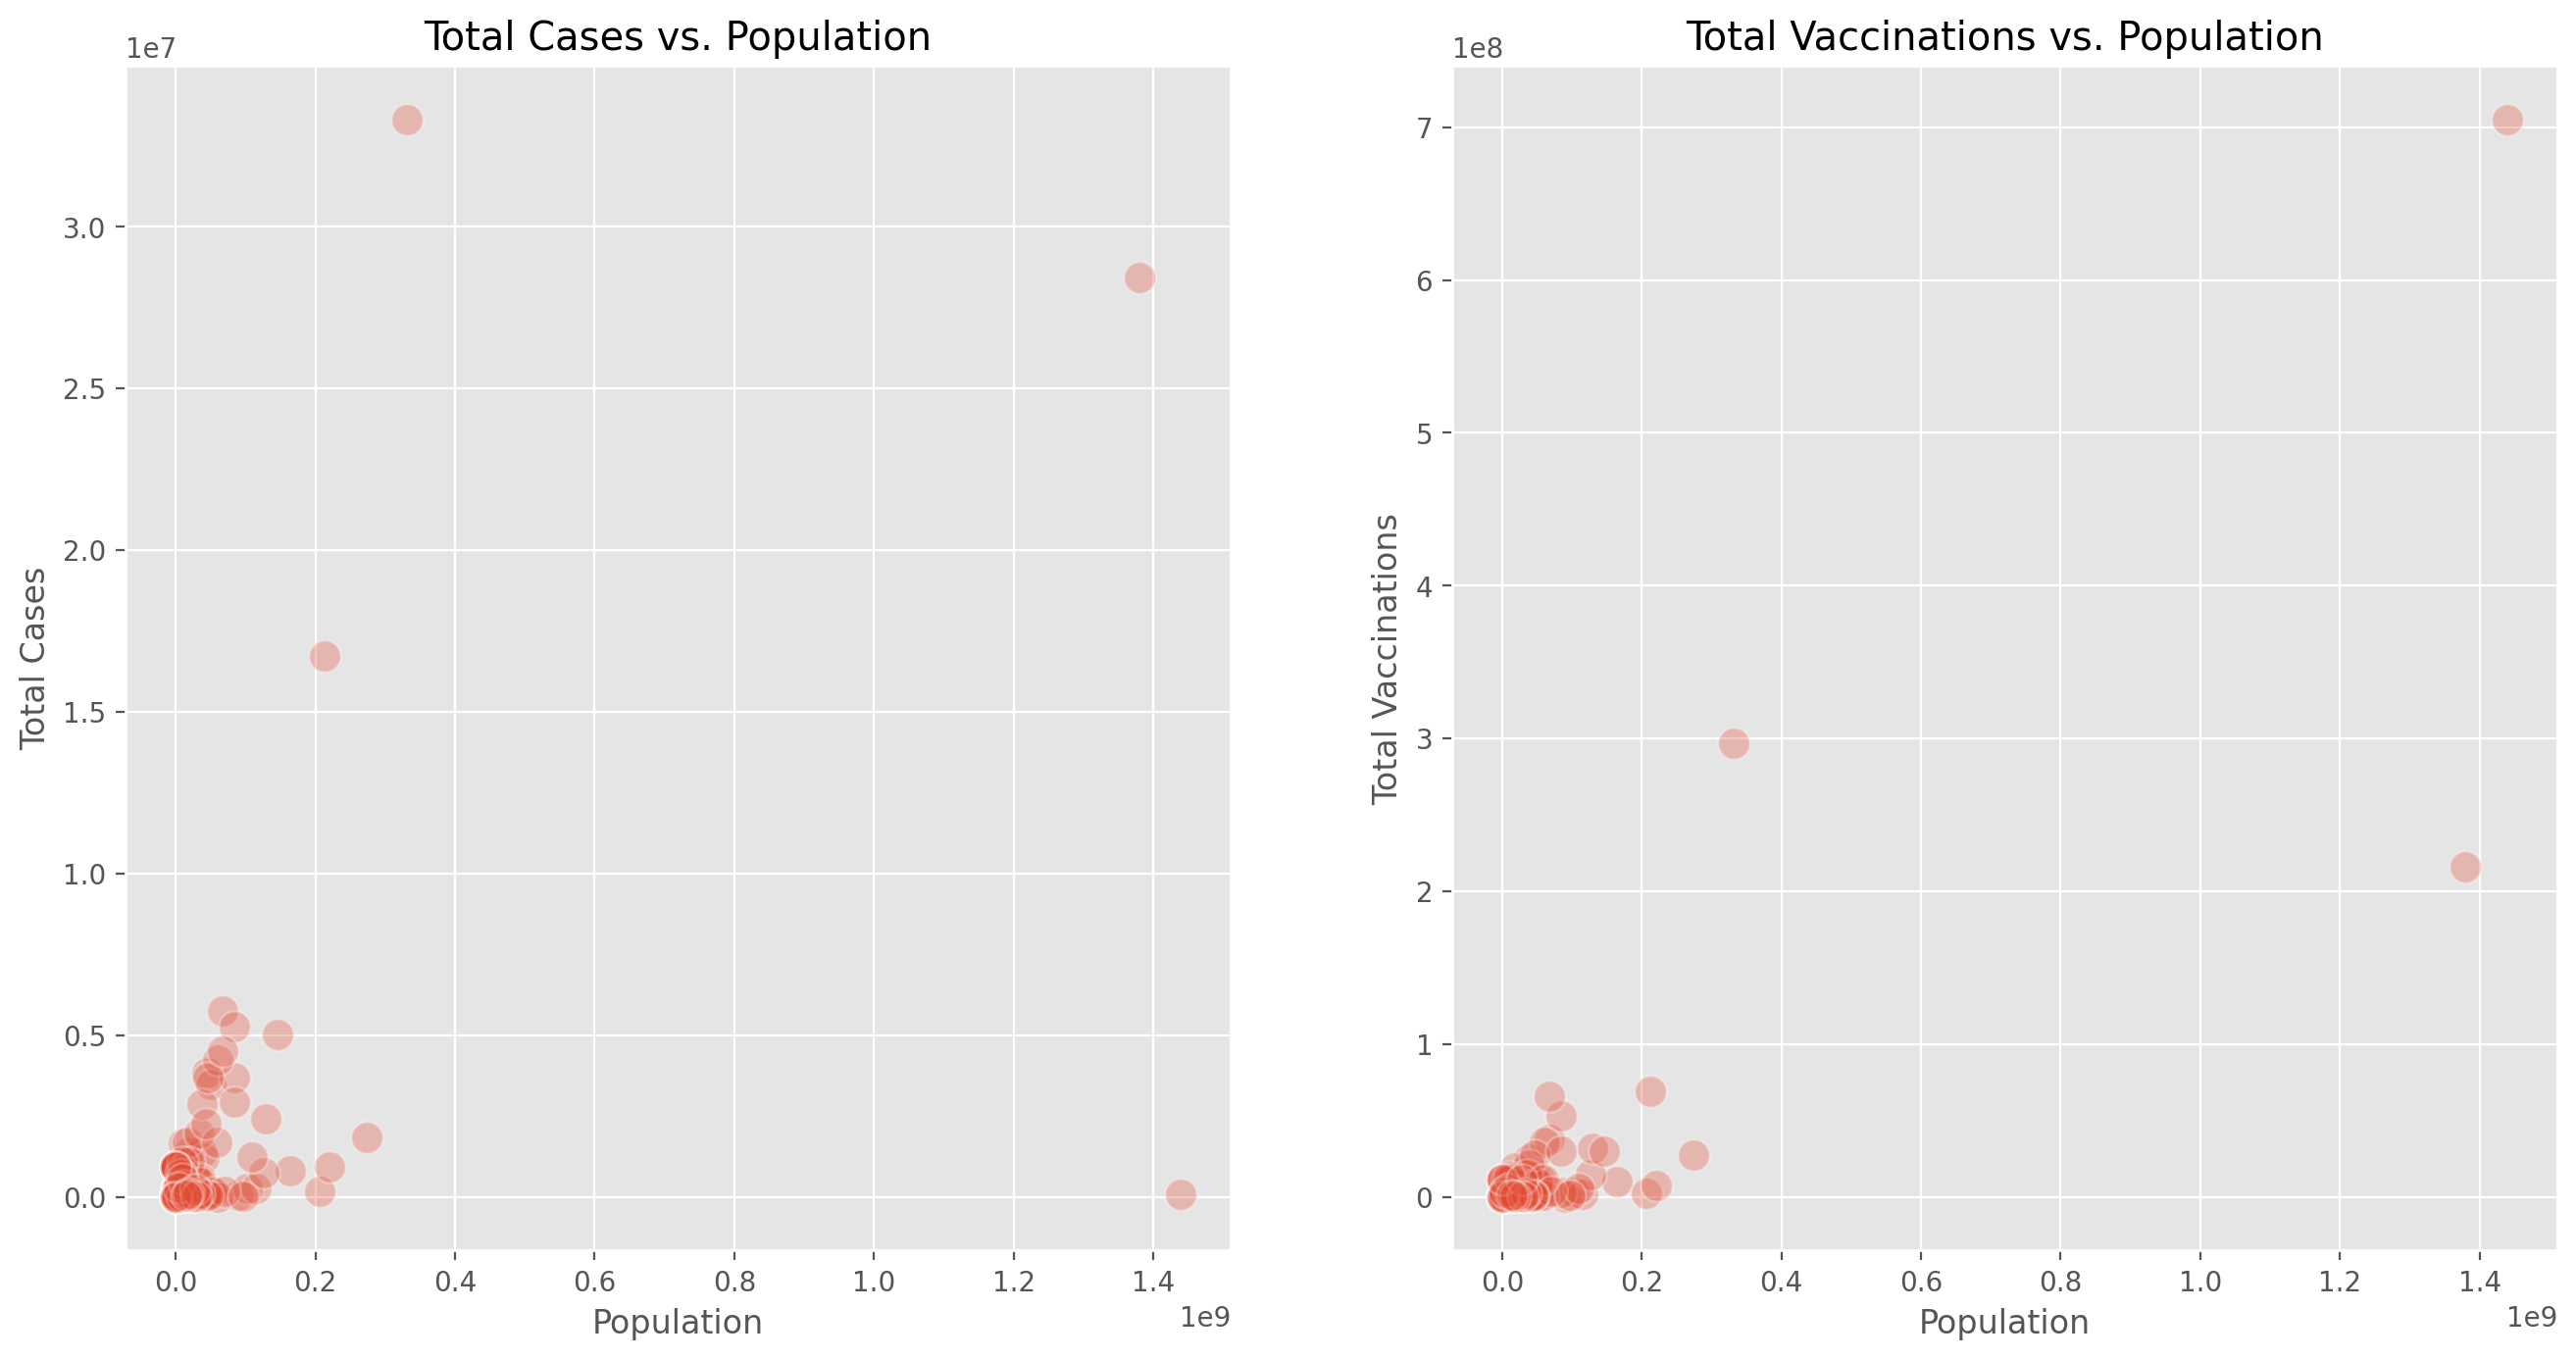

In [55]:
# Creating subplots

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,8), dpi=200)



# Creating first scatterplot on first set of axes

sns.scatterplot(x="population",
                y="total_cases",
                data=cases_pop,
                s=135,
                alpha=0.3,
                ax=ax[0])

ax[0].set_title("Total Cases vs. Population")
ax[0].set_xlabel("Population")
ax[0].set_ylabel("Total Cases")



# Creating second scatterplot on second set of axes

sns.scatterplot(x="population",
                y="total_vaccinations",
                data=vaccinations_pop,
                s=135,
                alpha=0.3,
                ax=ax[1])

ax[1].set_title("Total Vaccinations vs. Population")
ax[1].set_xlabel("Population")
ax[1].set_ylabel("Total Vaccinations")

plt.show()

In [56]:
sp.stats.pearsonr(vaccinations_pop.total_vaccinations, vaccinations_pop.population)

(0.8499524233991782, 3.6025413251040607e-56)

In [57]:
sp.stats.pearsonr(cases_pop.total_cases, cases_pop.population)

(0.5337311268943389, 6.703088334978666e-16)

### Conclusion
Here we see that both Total Cases and Total Vaccinations appear to be positively correlated with Population. Total Vaccinations appear to have a strong correlation with Population while Total Vaccinations appears to have a moderate correlation with Population. Thus, it makes sense that Population could be a confounding variable that causes such a strong correlation between Total Cases and Total Vaccinations. This seems like a more logical conclusion since a higher population would imply a greater number of vaccines being distributed and a greater number of SARS-CoV-2 cases being detected. 

# Part III: Introducing Supervised Machine Learning
## Implementing Linear Regression ML Model
My goal with this section is leverage Scikit learn to train a linear regression model based on key features from the JSON data we collected. In order to create a robust predictive model we should provide an array of highly correlated features to train our model with. 


Before we begin, let's first gain insight on the pearson correlation coefficients between all columns and total deaths.

In [58]:
valid_entries = countries.drop(columns=["last_updated_date", "location", "continent", "tests_units"]).astype(float)
valid_entries.corr()["total_deaths"].sort_values(ascending=False)

total_deaths                             1.000000
total_cases                              0.919129
people_vaccinated                        0.838600
people_fully_vaccinated                  0.835113
total_tests                              0.755252
new_deaths_smoothed                      0.712286
new_cases                                0.674170
new_cases_smoothed                       0.611482
new_tests_smoothed                       0.543400
new_tests                                0.509270
population                               0.410148
total_vaccinations                       0.398271
total_deaths_per_million                 0.369399
new_deaths_smoothed_per_million          0.218591
new_deaths                               0.207069
total_cases_per_million                  0.193256
new_deaths_per_million                   0.184535
human_development_index                  0.177949
median_age                               0.165102
aged_65_older                            0.161963


In [59]:
# Before I knew about .corr() on a DataFrame...

# r_coeff = pd.Series(dtype='float64')
# valid_entries = countries.drop(columns=["last_updated_date", "location", "continent", "tests_units"])

# for column in valid_entries.columns:
#     if column == "total_deaths":
#         continue
        
#     temp = valid_entries[[column, "total_deaths"]].dropna(axis=0, subset=[column, "total_deaths"])
#     r, pval = sp.stats.pearsonr(temp[column], temp["total_deaths"])
    
#     ser = pd.Series([r], index=[column])
#     r_coeff = r_coeff.append(ser)
    
# r_coeff.sort_values(ascending=False)

### Feature Selection
We can see from the series we constructed that there are many features that have little to no linear correlation with the total number of deaths for each country. However, there are a few features that have a very strong linear corrleation with the total number of deaths for each country. Let's construct a linear ML model and feed it the 3 most highly linearly correlated features: Total Cases, Total Test, and Weekly Hospital Admissions.

In [103]:
linreg_df = countries[["total_cases", "total_tests", "people_fully_vaccinated", "total_deaths"]]

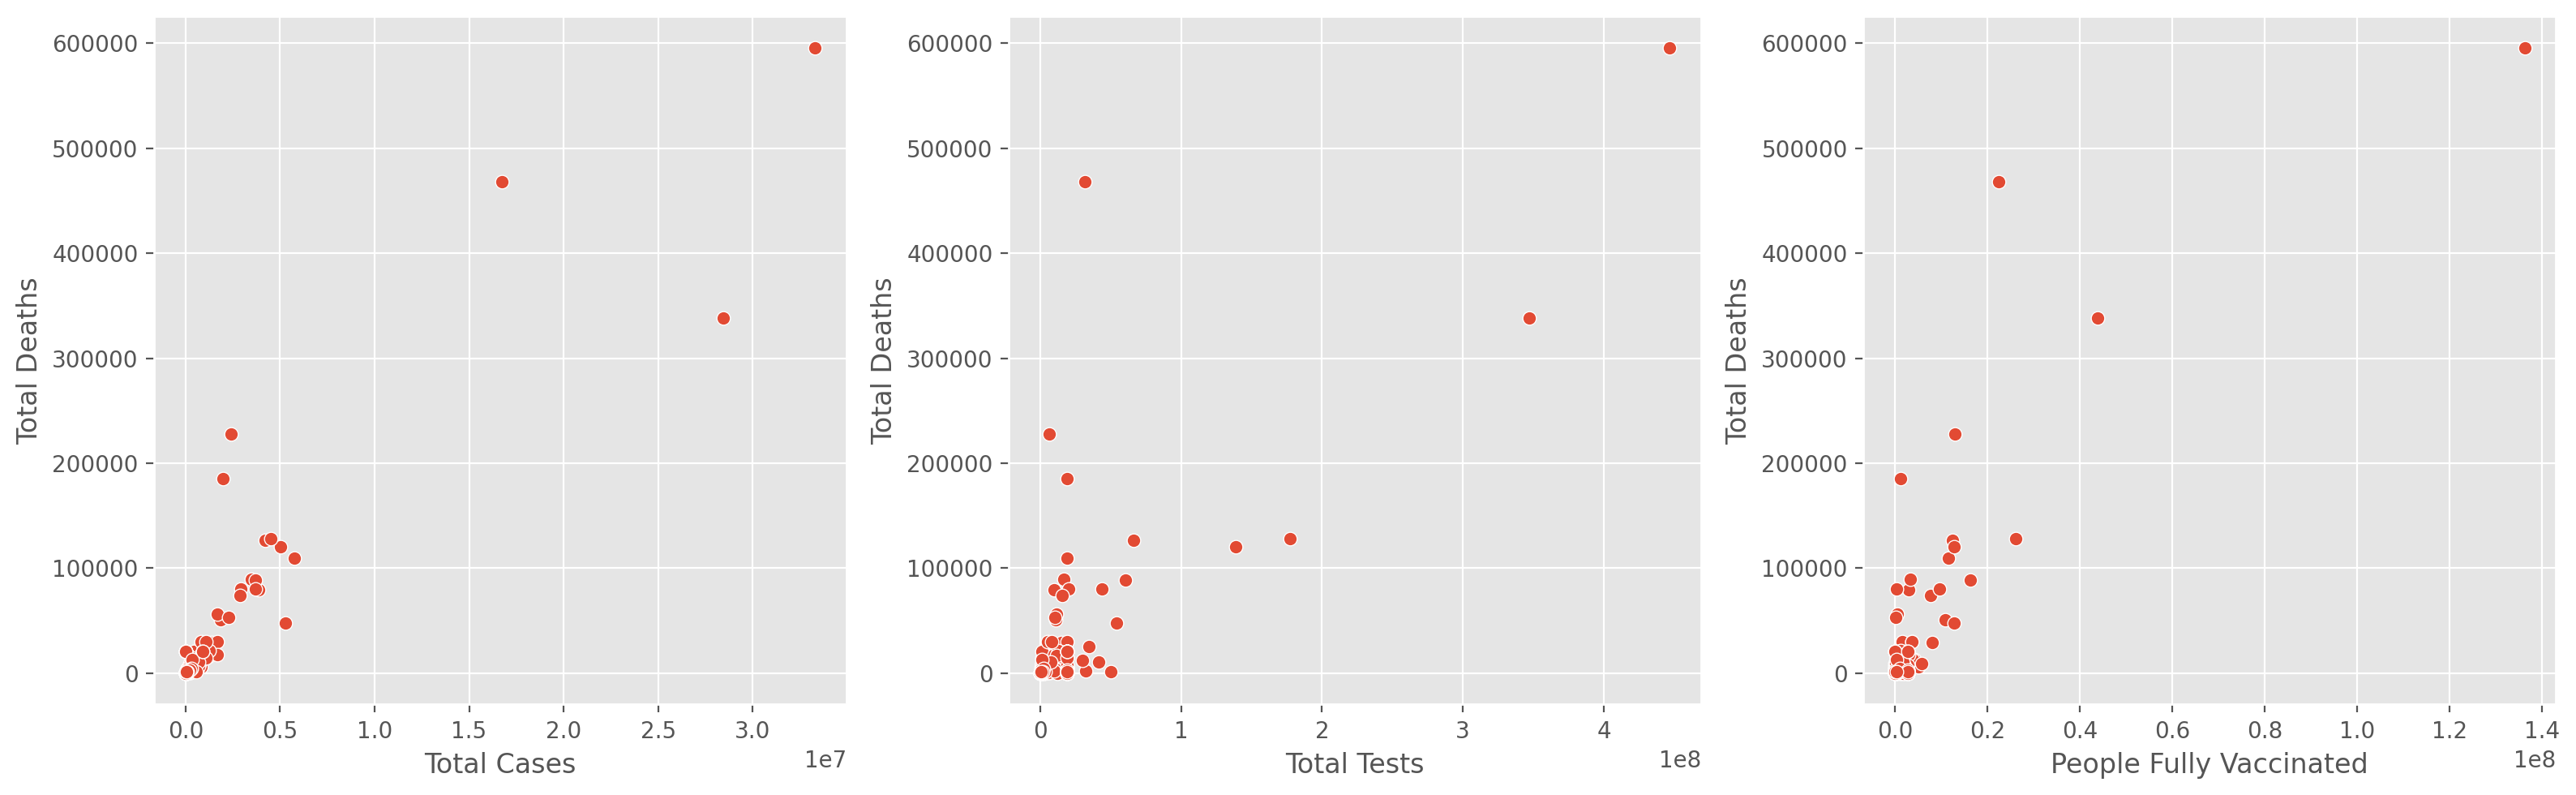

In [61]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(16,5), dpi=200)


feature_labels = ["total_cases", "total_tests", "people_fully_vaccinated"]

for iterator in range(0, len(feature_labels)):
    sns.scatterplot(x=feature_labels[iterator],
                    y="total_deaths",
                    data=linreg_df,
                    ax=ax[iterator])
    
    ax[iterator].set_xlabel(feature_labels[iterator].replace('_', ' ').title())
    ax[iterator].set_ylabel("Total Deaths")

plt.tight_layout()
plt.show();

In [104]:
sp.stats.pearsonr(linreg_df.total_cases, linreg_df.total_deaths)

(0.9191294117359531, 8.032198377828242e-81)

In [105]:
sp.stats.pearsonr(linreg_df.people_fully_vaccinated, linreg_df.total_deaths)

(0.8351131817066001, 1.6459876689285375e-52)

In [106]:
sp.stats.pearsonr(linreg_df.total_tests, linreg_df.total_deaths)

(0.7552517621033089, 1.258580372527267e-37)

The pearson correlation coefficient of these 3 features and Total Deaths are substantial, and, as a result, can be used to train a linear regression model. Ideally, this model will accurately predict future Total Deaths based on the numerical value provided for each feature, but linear models have their limitations and the error might increase as the virus evolves.

In [65]:
X = linreg_df.drop("total_deaths", axis=1)
y = linreg_df["total_deaths"]

In [66]:
len(X), len(y)

(197, 197)

In [67]:
y.head()

AFG    3007.0
ALB    2451.0
DZA    3490.0
AND     127.0
AGO     780.0
Name: total_deaths, dtype: float64

### Train | Test Split

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [70]:
len(X_train), len(y_train), len(X_test), len(y_test)

(131, 131, 66, 66)

### Model Import

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
linear_model = LinearRegression()

### Model Fitting to Training Data

In [73]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [74]:
predictions = linear_model.predict(X_test)

### Error Analysis of Linear Model

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [76]:
MAE = mean_absolute_error(y_test, predictions)

In [77]:
MSE = mean_squared_error(y_test, predictions)

In [78]:
RMSE = np.sqrt(MSE)

In [79]:
MAE, MSE, RMSE

(7778.502014356622, 95182720.04157692, 9756.163182397931)

In [80]:
test_residuals = y_test - predictions

In [81]:
test_residuals

PNG    -3181.111713
MLT   -11062.431814
BLR   -12070.883846
GTM    -7162.702064
STP     2654.829101
           ...     
CHL   -15074.473613
KHM   -14818.649437
KIR    17458.577358
SYC     2354.743598
COM     2667.836250
Name: total_deaths, Length: 66, dtype: float64

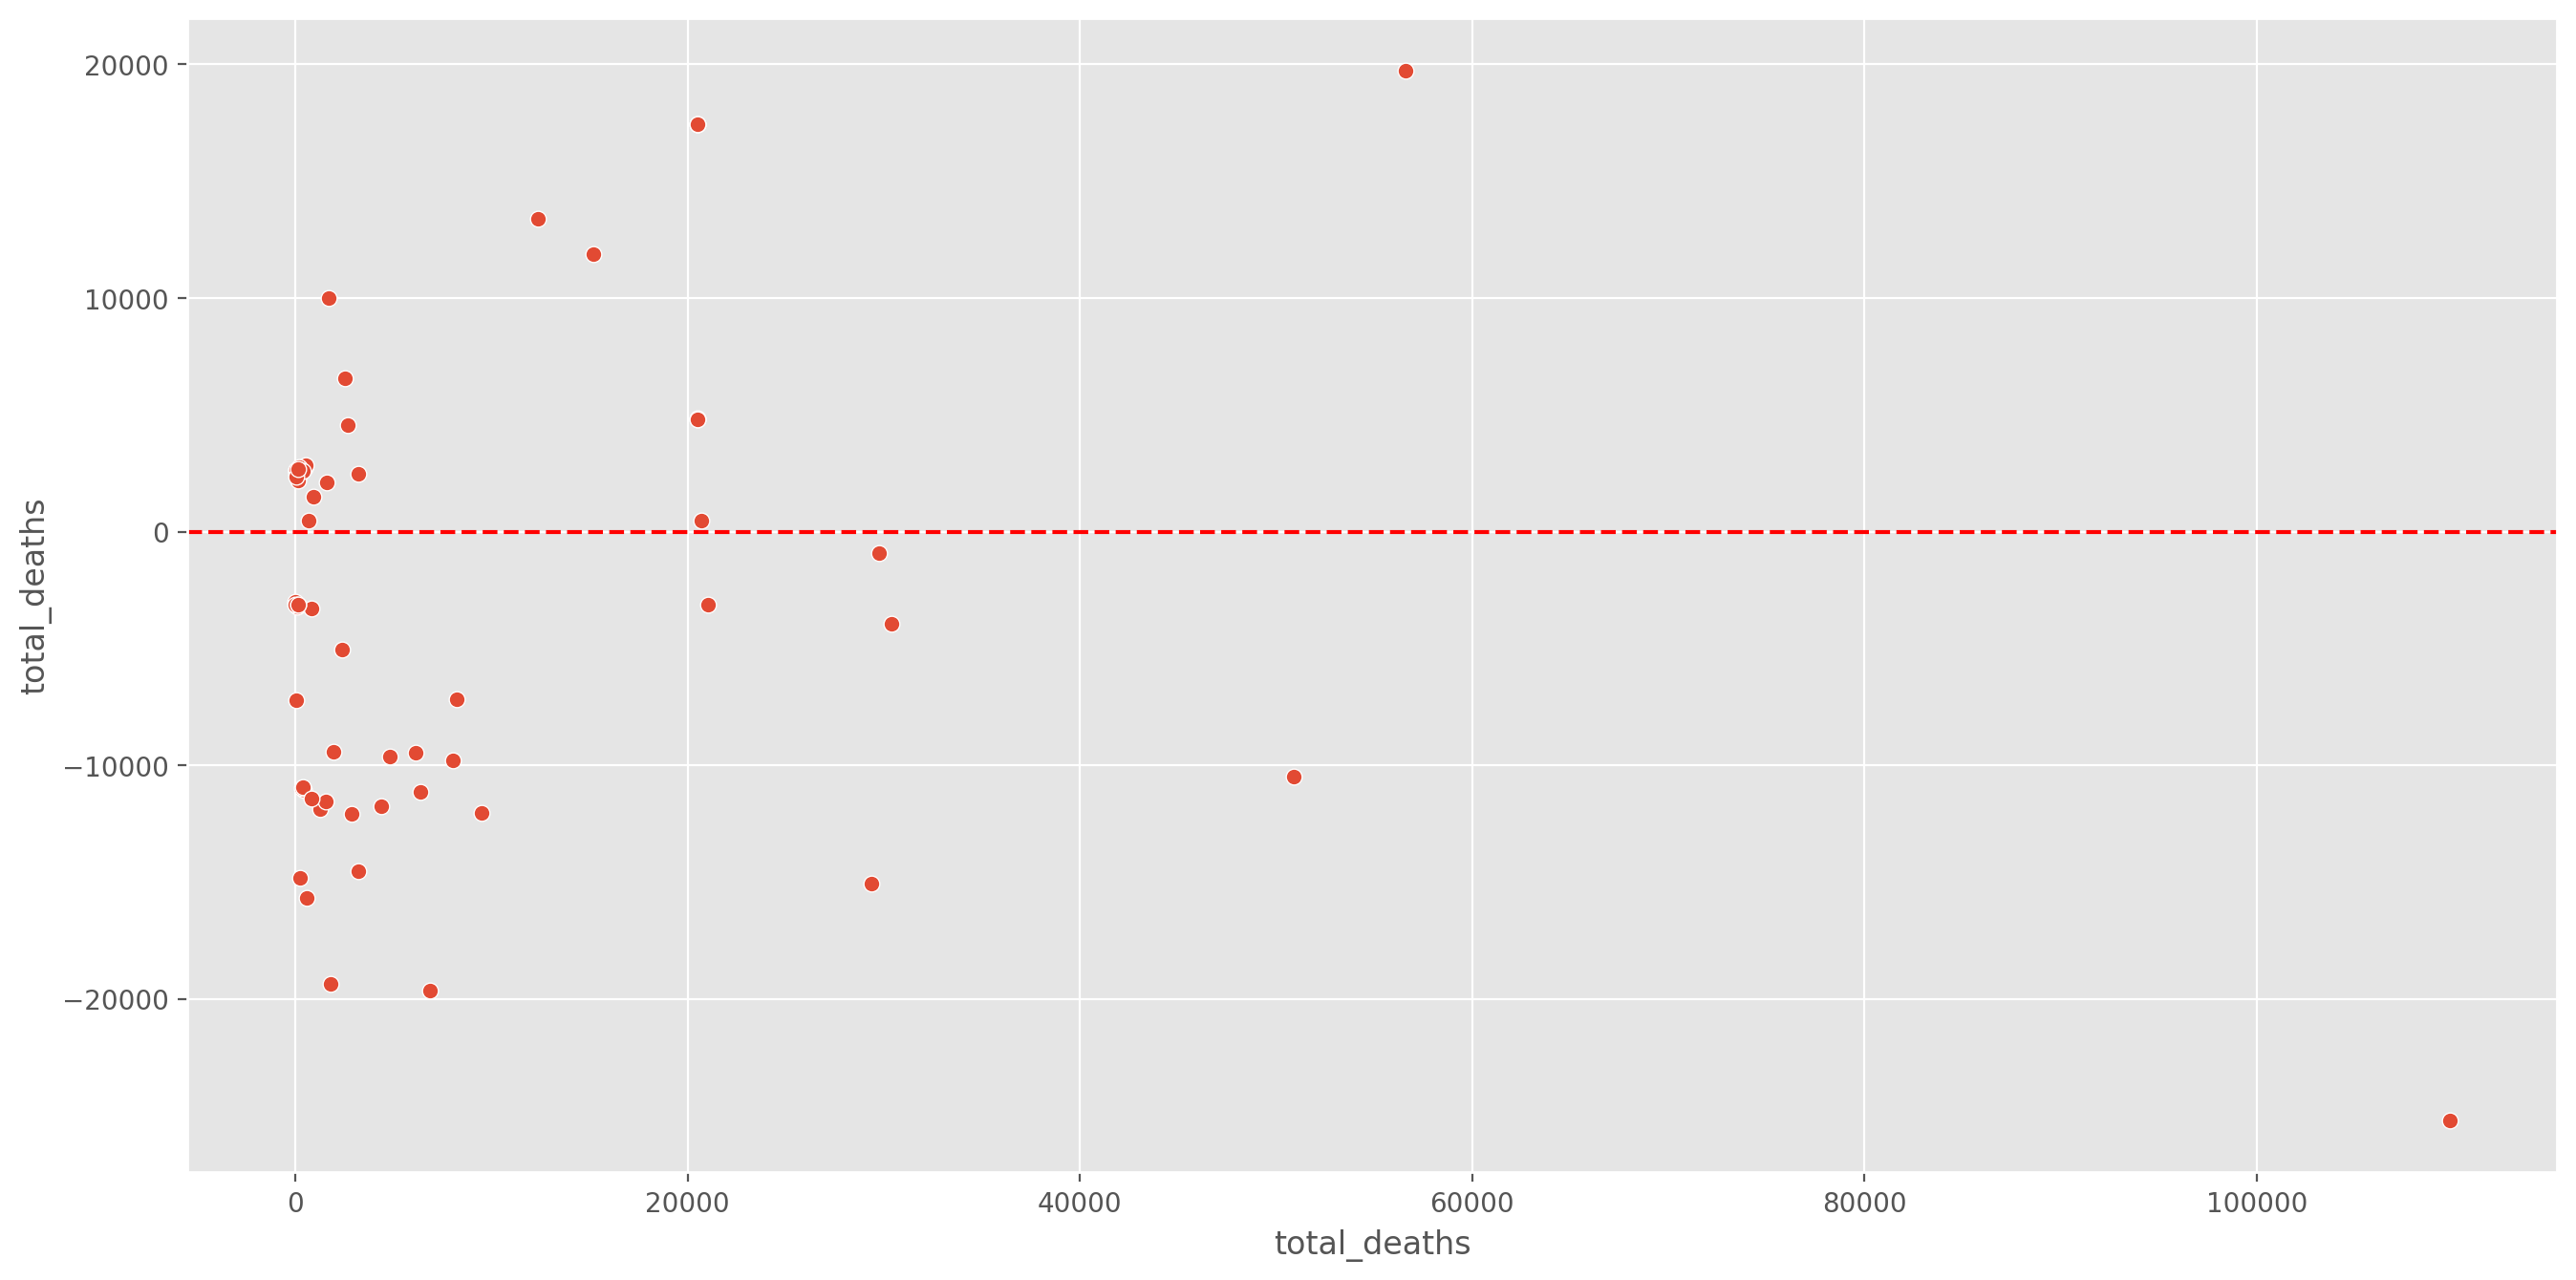

In [82]:
plt.figure(figsize=(16,8), dpi=200)
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

plt.show();

### Conclusion
We can see that we have relatively poor error metrics. RMSE generally punishes greater discrepancies, but even our MAE is relatively high when considering the magnitude of the measurements. Our MAE and RMSE indicate poor accuracy with Linear Regression. 

In [83]:
import statsmodels as sm
import statsmodels.formula.api as smf

In [84]:
lm = smf.ols(formula="total_deaths ~ total_cases + total_tests + people_fully_vaccinated", data=countries)

In [85]:
lm_result = lm.fit()
lm_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           total_deaths   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     452.7
Date:                Thu, 03 Jun 2021   Prob (F-statistic):           4.77e-87
Time:                        10:02:24   Log-Likelihood:                -2255.9
No. Observations:                 197   AIC:                             4520.
Df Residuals:                     193   BIC:                             4533.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                9570.7086   1868.819      5.121      0.000    5884.777    1.33e+04
total_cases                 0.0194      0.001     16.594      0.000       0.017       0.022
total_tests                -0.0006    9.5e-05     -6.701      0.000      -0.001      -0.000
people_fully_vaccinated     0.0018      0.000      4.742      0.000       0.001       0.003
==============================================================================
Omnibus:                      195.058   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4680.455
Skew:                           3.811   Prob(JB):                         0.00
Kurtosis:                      25.630   Cond. No.                     5.45e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.45e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [86]:
linear_model.coef_

array([ 0.01992535, -0.00072664,  0.00202204])